In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from IPython.display import set_matplotlib_formats
from matplotlib.ticker import FormatStrFormatter

#set_matplotlib_formats('png', 'svg')
%matplotlib inline

In [2]:
def read_fshaper_npz(filename):
    data = np.load(filename)
    means_all_10 = data['means_all_10']
    stds_all_10 = data['stds_all_10']
    ratio_all_10 = data['ratio_all_10']
    means_all_25 = data['means_all_25']
    stds_all_25 = data['stds_all_25']
    ratio_all_25 = data['ratio_all_25']
    means_all_20_s = data['means_all_20_s']
    stds_all_20_s = data['stds_all_20_s']
    ratio_all_20_s = data['ratio_all_20_s']
    means_all_cubic = data['means_all_cubic']
    stds_all_cubic = data['stds_all_cubic']
    ratio_all_cubic = data['ratio_all_cubic']
    if 'us' in filename:
        cis_all_10 = data['cis_all_10']
        cis_all_25 = data['cis_all_25']
        cis_all_20_s = data['cis_all_20_s']
        cis_all_cubic = data['cis_all_cubic']

    means_all = (means_all_10, means_all_25, means_all_20_s, means_all_cubic) 
    if 'us' in filename:
        stds_all = (cis_all_10, cis_all_25, cis_all_20_s, cis_all_cubic)
    else:
        stds_all = (stds_all_10, stds_all_25, stds_all_20_s, stds_all_cubic)
    ratios_all = (ratio_all_10, ratio_all_25, ratio_all_20_s, ratio_all_cubic)
    return means_all, stds_all, ratios_all
# heatmap: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", 
            xlabel="Cross Traffic", ylabel="Calibrator", degree=-30,**kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    
    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.weight': 'bold'})
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Verdana'})
    plt.rcParams.update({'pdf.fonttype': 42})
    plt.rcParams.update({'ps.fonttype': 42})

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, format='%.2f', **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, fontsize=22, va="bottom", fontweight='bold')

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_xticklabels(col_labels, fontsize=22, fontweight='bold')
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_yticklabels(row_labels, fontsize=22, fontweight='bold')
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    if xlabel != "Run Number":
        ax.set_xlabel(xlabel, fontweight='bold')
        ax.xaxis.set_label_position('top') 
    ax.set_ylabel(ylabel, fontweight='bold')

    # Rotate the tick labels and set their alignment.
    if degree != 0:
        plt.setp(ax.get_xticklabels(), rotation=degree, ha="right",
                 rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     std = None, hasStd = False,
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """
    
    plt.rcParams.update({'font.size': 20})
    plt.rcParams.update({'font.weight': 'bold'})
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Verdana'})
    plt.rcParams.update({'pdf.fonttype': 42})
    plt.rcParams.update({'ps.fonttype': 42})

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            if hasStd:
                text = im.axes.text(j, i, valfmt(data[i, j], None)+std[i, j], **kw)
            else:
                text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts
def plot_ccas(r1, r2, r3, r4, pos_th, goodputs, names=['New Reno', 'Vegas', 'BBRv2', 'Cubic']):
    fig, ax = plt.subplots(figsize=(24, 7))
    #plt.figure()

    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.weight': 'bold'})
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Verdana'})
    plt.rcParams.update({'pdf.fonttype': 42})
    plt.rcParams.update({'ps.fonttype': 42})

    bp1 = ax.boxplot(r1, boxprops=dict(linewidth=2.0, facecolor='blue', color='black'),
                         positions=[i-0.3 for i in range(1, 16)],
                        whiskerprops=dict(linewidth=2.0, color='black'),
                        medianprops=dict(linewidth=2.0, color='red'),
                        capprops=dict(linewidth=2.0, color='black'),
                        flierprops=dict(marker='o', markersize=10,
                                linestyle='none', markeredgecolor='b'), 
                     widths=0.2, patch_artist=True, showfliers=False)
    bp2 = ax.boxplot(r2, boxprops=dict(linewidth=2.0, color='blue'), 
                         positions=[i-0.1 for i in range(1, 16)],
                        whiskerprops=dict(linewidth=2.0, color='blue'),
                        medianprops=dict(linewidth=2.0, color='red'),
                        capprops=dict(linewidth=2.0, color='blue'),
                        flierprops=dict(marker='o', markersize=10,
                                linestyle='none', markeredgecolor='b'), 
                     widths=0.2, showfliers=False)
    bp3 = ax.boxplot(r3, boxprops=dict(linewidth=2.0, facecolor='C0', color='black'), 
                         positions=[i+0.1 for i in range(1, 16)],
                        whiskerprops=dict(linewidth=2.0, color='black'),
                        medianprops=dict(linewidth=2.0, color='red'),
                        capprops=dict(linewidth=2.0, color='black'),
                        flierprops=dict(marker='o', markersize=10,
                                linestyle='none', markeredgecolor='b'), 
                     widths=0.2, patch_artist=True, showfliers=False)
    bp4 = ax.boxplot(r4, boxprops=dict(linewidth=2.0, facecolor='limegreen', color='blue'), 
                         positions=[i+0.3 for i in range(1, 16)],
                        whiskerprops=dict(linewidth=2.0, color='blue'),
                        medianprops=dict(linewidth=2.0, color='red'),
                        capprops=dict(linewidth=2.0, color='blue'),
                        flierprops=dict(marker='o', markersize=10,
                                linestyle='none', markeredgecolor='b'), 
                     widths=0.2, patch_artist=True, showfliers=False)
    ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
    ax.set_xlabel("Run Number", fontsize=22, fontweight='bold')
    plt.xticks([i for i in range(1, 16)], [i for i in range(1, 16)])
    plt.grid(linestyle=":")
    plt.xticks(fontsize=22)
    plt.ylim([0.88, 1.55])

    ax2 = ax.twinx()
    #ax2.set_ylabel('Bandwidth Share', color='tab:blue', fontsize=22, fontweight='bold')
    ax2.set_ylabel('Total Measured Goodput (Mbps)', color='g', fontsize=22, fontweight='bold')
    bp5 = ax2.plot(pos_th, totals, 'g--', lw=3)
    #bp3 = ax2.plot([i for i in range(1, 16)], fairness, 'g--', lw=3)
    plt.ylim([930, 960])
    plt.yticks(fontsize=22, color='g')

    plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0], bp5[0]], 
               [names[0], names[1], names[2], names[3], 'Total Goodput'], 
               loc='upper right', ncol=5)

    #plt.savefig('diff_cca.pdf', format='pdf')
    plt.show()
def plot_boxchar(p99_all, total_stds, legendX='Median User Value', legendY='Controlled Flows',
                 ylabel='Throughput std dev', ylim = [], ylim2 = [], name = "", pos = 'upper right'):
    fig, ax = plt.subplots(figsize=(24, 7))
    #plt.figure()

    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.weight': 'bold'})
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Verdana'})
    plt.rcParams.update({'pdf.fonttype': 42})
    plt.rcParams.update({'ps.fonttype': 42})

    bp1 = ax.boxplot(p99_all, boxprops=dict(linewidth=2.0, color='blue'), 
                     #positions = [int(0.13*i) for i in percentages],
                    whiskerprops=dict(linewidth=2.0, color='blue'),
                    medianprops=dict(linewidth=2.0, color='red'),
                    capprops=dict(linewidth=2.0, color='blue'),
                    flierprops=dict(marker='o', markersize=10,
                          linestyle='none', markeredgecolor='b'), showfliers=False)
    ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
    ax.set_xlabel("Percentage of Calibrator Flow (%)", fontsize=22, fontweight='bold')
    plt.grid(linestyle=":")
    plt.xticks(np.arange(len(percentages))+1, percentages, fontsize=22)
    plt.yticks(fontsize=22)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.ylim(ylim)

    ax2 = ax.twinx()
    ax2.set_ylabel(ylabel, color='g', fontsize=22, fontweight='bold')
    bp3 = ax2.plot([i for i in range(1, len(total_stds)+1)], total_stds, 'g--', lw=3)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.yticks(fontsize=22, color='g')
    plt.ylim(ylim2)

    plt.legend([bp1["boxes"][0], bp3[0]], [legendX, legendY], 
               loc=pos, ncol=2)

    #if len(name)> 0:
    #    plt.savefig(name, format='pdf')
    plt.show()

## fShaper standalone evaluation

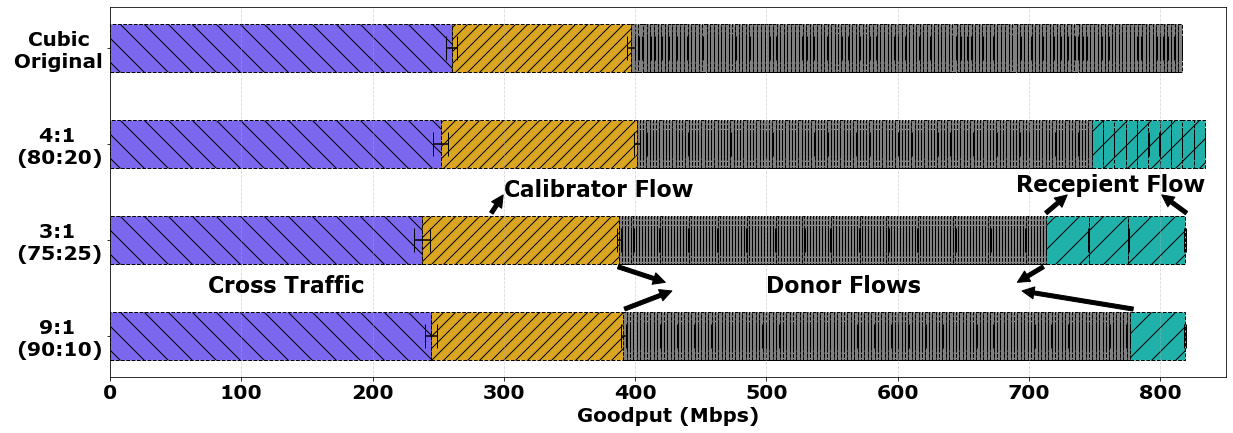

In [16]:
## Figure 10 (a)
means_all, stds_all, ratios_all = read_fshaper_npz("data/us_fshaper_major_0507.npz")

N = 4
ind = np.arange(N)
width = 0.25
types = ['/', '\'', '|', '-', '+', 'x', 'o', 'O', '.', '*']

fig = plt.figure(figsize=(20, 6.8))
# fig.subplots_adjust(left=0.115, right=0.88)
ax = fig.add_subplot(1,1,1)
pls = []
ax.set_xlim([0, 98])

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

means_all_10, means_all_25, means_all_20_s, means_all_cubic = means_all
stds_all_10, stds_all_25, stds_all_20_s, stds_all_cubic = stds_all
ratio_all_10, ratio_all_25, ratio_all_20_s, ratio_all_cubic = ratios_all

for i in range(means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    if i >= 142:
        break
    elif i == 1:
        hatch_type = '//'
        color_type = '#DAA520'
    elif i == 0:
        hatch_type = '\\'
        color_type = '#7B68EE'

    p1 = ax.barh(ind, [means_all_10[i], means_all_25[i], means_all_20_s[i], means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_10[:i]), np.sum(means_all_25[:i]), 
                       np.sum(means_all_20_s[:i]), np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_10[i], stds_all_25[i], stds_all_20_s[i], stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)

for i in range(142, means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    p1 = ax.barh([3], [means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 151:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([0], [means_all_10[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_10[:i])], 
            xerr=[stds_all_10[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 149:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([1], [means_all_25[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_25[:i])], 
            xerr=[stds_all_25[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 142:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([2], [means_all_20_s[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_20_s[:i])], 
            xerr=[stds_all_20_s[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)
    

ax.annotate('Cross Traffic', xy=(75, 0.45), weight='bold', clip_on=True)

ax.annotate('', xy=(300, 1.48), xytext=(290, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Calibrator Flow', xy=(300, 1.45), weight='bold', clip_on=True)

recepient_flow = (690, 1.5)
ax.annotate('Recepient Flow', xy=recepient_flow, weight='bold', clip_on=True)
ax.annotate('', xy=(730, 1.48), xytext=(712, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(800, 1.48), xytext=(821, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Donor Flows', xy=(500, 0.45), weight='bold', clip_on=True)
ax.annotate('', xy=(425, 0.55), xytext=(385, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(690, 0.55), xytext=(712, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(430, 0.48), xytext=(390, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(690, 0.48), xytext=(784, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.xaxis.grid(True, linestyle="--", alpha=0.5)
ax.set_xlabel('Goodput (Mbps)', fontsize=20, fontweight='bold')
plt.yticks(ind, ('9:1    \n(90:10)', '3:1    \n(75:25)', '4:1    \n(80:20)', 'Cubic  \n Original'), weight='bold', fontsize=20) 
plt.xticks(np.arange(0, 8e2+1e1, 1e2), weight='bold', fontsize=20)
plt.xlim([0, 850])
#plt.savefig('US_major_wired.pdf', format='pdf')
plt.show()

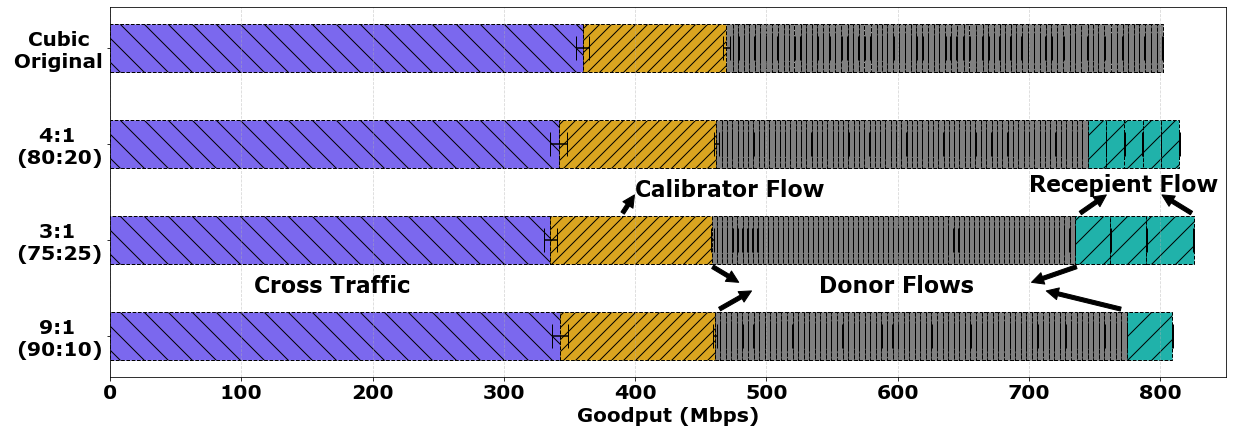

In [17]:
## Figure 10 (b)
means_all, stds_all, ratios_all = read_fshaper_npz("data/us_fshaper_minor_0507.npz")

N = 4
ind = np.arange(N)
width = 0.25
types = ['/', '\'', '|', '-', '+', 'x', 'o', 'O', '.', '*']

fig = plt.figure(figsize=(20, 6.8))
# fig.subplots_adjust(left=0.115, right=0.88)
ax = fig.add_subplot(1,1,1)
pls = []
ax.set_xlim([0, 98])

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

means_all_10, means_all_25, means_all_20_s, means_all_cubic = means_all
stds_all_10, stds_all_25, stds_all_20_s, stds_all_cubic = stds_all
ratio_all_10, ratio_all_25, ratio_all_20_s, ratio_all_cubic = ratios_all

for i in range(means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    if i >= 70:
        break
    elif i == 1:
        hatch_type = '//'
        color_type = '#DAA520'
    elif i == 0:
        hatch_type = '\\'
        color_type = '#7B68EE'

    p1 = ax.barh(ind, [means_all_10[i], means_all_25[i], means_all_20_s[i], means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_10[:i]), np.sum(means_all_25[:i]), 
                       np.sum(means_all_20_s[:i]), np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_10[i], stds_all_25[i], stds_all_20_s[i], stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)

for i in range(70, means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    p1 = ax.barh([3], [means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 76:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([0], [means_all_10[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_10[:i])], 
            xerr=[stds_all_10[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 74:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([1], [means_all_25[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_25[:i])], 
            xerr=[stds_all_25[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 72:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([2], [means_all_20_s[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_20_s[:i])], 
            xerr=[stds_all_20_s[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)
    

ax.annotate('Cross Traffic', xy=(110, 0.45), weight='bold', clip_on=True)

ax.annotate('', xy=(400, 1.48), xytext=(390, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Calibrator Flow', xy=(400, 1.45), weight='bold', clip_on=True)

recepient_flow = (700, 1.5)
ax.annotate('Recepient Flow', xy=recepient_flow, weight='bold', clip_on=True)
ax.annotate('', xy=(760, 1.48), xytext=(738, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(800, 1.48), xytext=(825, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Donor Flows', xy=(540, 0.45), weight='bold', clip_on=True)
ax.annotate('', xy=(480, 0.55), xytext=(458, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(700, 0.55), xytext=(738, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(490, 0.48), xytext=(463, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(710, 0.48), xytext=(773, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.xaxis.grid(True, linestyle="--", alpha=0.5)
ax.set_xlabel('Goodput (Mbps)', fontsize=20, fontweight='bold')
plt.yticks(ind, ('9:1    \n(90:10)', '3:1    \n(75:25)', '4:1    \n(80:20)', 'Cubic  \n Original'), weight='bold', fontsize=20) 
plt.xticks(np.arange(0, 8e2+1e1, 1e2), weight='bold', fontsize=20)
plt.xlim([0, 850])
#plt.savefig('US_minor_wired.pdf', format='pdf')
plt.show()

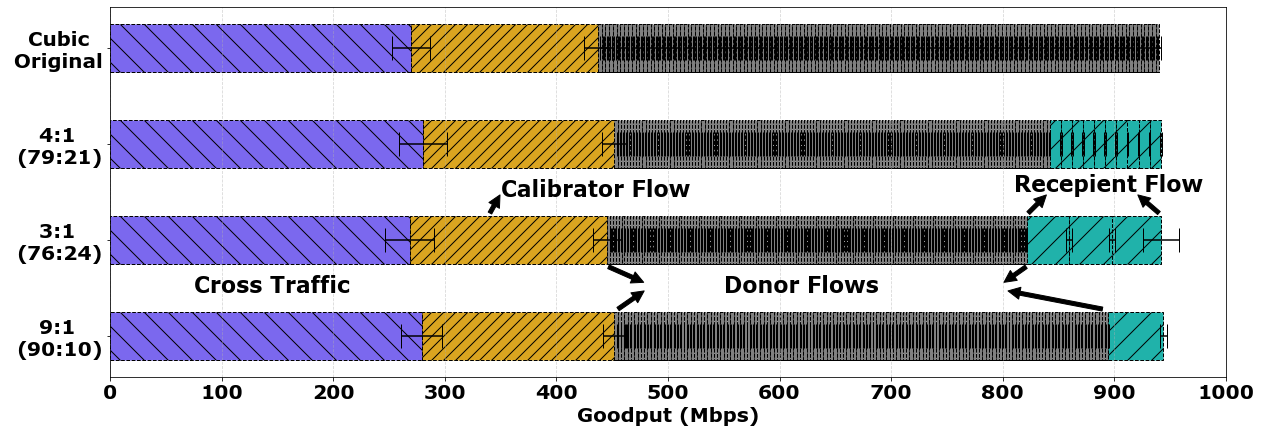

In [18]:
## Figure 22 (a)
means_all, stds_all, ratios_all = read_fshaper_npz("data/tw_fshaper_major_1223.npz")

N = 4
ind = np.arange(N)
width = 0.25
types = ['/', '\'', '|', '-', '+', 'x', 'o', 'O', '.', '*']

fig = plt.figure(figsize=(20, 6.8))
# fig.subplots_adjust(left=0.115, right=0.88)
ax = fig.add_subplot(1,1,1)
pls = []
ax.set_xlim([0, 98])

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

means_all_10, means_all_25, means_all_20_s, means_all_cubic = means_all
stds_all_10, stds_all_25, stds_all_20_s, stds_all_cubic = stds_all
ratio_all_10, ratio_all_25, ratio_all_20_s, ratio_all_cubic = ratios_all

for i in range(means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    if i >= 142:
        break
    elif i == 1:
        hatch_type = '//'
        color_type = '#DAA520'
    elif i == 0:
        hatch_type = '\\'
        color_type = '#7B68EE'

    p1 = ax.barh(ind, [means_all_10[i], means_all_25[i], means_all_20_s[i], means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_10[:i]), np.sum(means_all_25[:i]), 
                       np.sum(means_all_20_s[:i]), np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_10[i], stds_all_25[i], stds_all_20_s[i], stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)

for i in range(142, means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    p1 = ax.barh([3], [means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 151:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([0], [means_all_10[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_10[:i])], 
            xerr=[stds_all_10[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 149:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([1], [means_all_25[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_25[:i])], 
            xerr=[stds_all_25[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 142:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([2], [means_all_20_s[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_20_s[:i])], 
            xerr=[stds_all_20_s[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)
    

ax.annotate('Cross Traffic', xy=(75, 0.45), weight='bold', clip_on=True)

ax.annotate('', xy=(350, 1.48), xytext=(340, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Calibrator Flow', xy=(350, 1.45), weight='bold', clip_on=True)

recepient_flow = (810, 1.5)
ax.annotate('Recepient Flow', xy=recepient_flow, weight='bold', clip_on=True)
ax.annotate('', xy=(840, 1.48), xytext=(822, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(920, 1.48), xytext=(941, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Donor Flows', xy=(550, 0.45), weight='bold', clip_on=True)
ax.annotate('', xy=(480, 0.55), xytext=(445, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(800, 0.55), xytext=(822, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(480, 0.48), xytext=(454, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(800, 0.48), xytext=(894, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.xaxis.grid(True, linestyle="--", alpha=0.5)
ax.set_xlabel('Goodput (Mbps)', fontsize=20, fontweight='bold')
plt.yticks(ind, ('9:1    \n(90:10)', '3:1    \n(76:24)', '4:1    \n(79:21)', 'Cubic  \n Original'), weight='bold', fontsize=20) 
plt.xticks(np.arange(0, 1e3+1e1, 1e2), weight='bold', fontsize=20)
#plt.savefig('Asia_major.pdf', format='pdf')
plt.show()

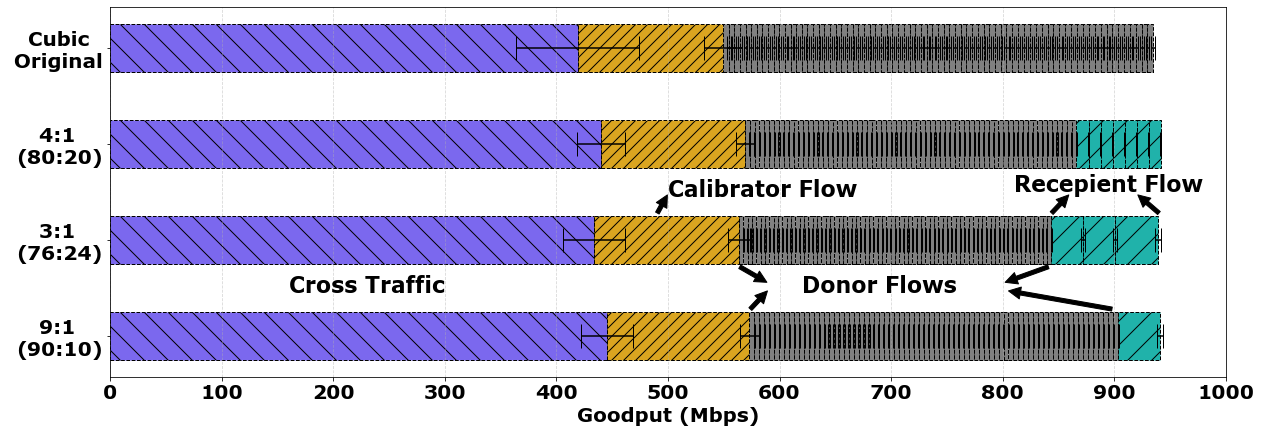

In [19]:
## Figure 22 (b)
means_all, stds_all, ratios_all = read_fshaper_npz("data/tw_fshaper_minor_1223.npz")

N = 4
ind = np.arange(N)
width = 0.25
types = ['/', '\'', '|', '-', '+', 'x', 'o', 'O', '.', '*']

fig = plt.figure(figsize=(20, 6.8))
# fig.subplots_adjust(left=0.115, right=0.88)
ax = fig.add_subplot(1,1,1)
pls = []
ax.set_xlim([0, 98])

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

means_all_10, means_all_25, means_all_20_s, means_all_cubic = means_all
stds_all_10, stds_all_25, stds_all_20_s, stds_all_cubic = stds_all
ratio_all_10, ratio_all_25, ratio_all_20_s, ratio_all_cubic = ratios_all

for i in range(means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    if i >= 70:
        break
    elif i == 1:
        hatch_type = '//'
        color_type = '#DAA520'
    elif i == 0:
        hatch_type = '\\'
        color_type = '#7B68EE'

    p1 = ax.barh(ind, [means_all_10[i], means_all_25[i], means_all_20_s[i], means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_10[:i]), np.sum(means_all_25[:i]), 
                       np.sum(means_all_20_s[:i]), np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_10[i], stds_all_25[i], stds_all_20_s[i], stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)

for i in range(70, means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    p1 = ax.barh([3], [means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 76:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([0], [means_all_10[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_10[:i])], 
            xerr=[stds_all_10[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 74:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([1], [means_all_25[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_25[:i])], 
            xerr=[stds_all_25[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 70:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([2], [means_all_20_s[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_20_s[:i])], 
            xerr=[stds_all_20_s[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)
    

ax.annotate('Cross Traffic', xy=(160, 0.45), weight='bold', clip_on=True)

ax.annotate('', xy=(500, 1.48), xytext=(490, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Calibrator Flow', xy=(500, 1.45), weight='bold', clip_on=True)

recepient_flow = (810, 1.5)
ax.annotate('Recepient Flow', xy=recepient_flow, weight='bold', clip_on=True)
ax.annotate('', xy=(860, 1.48), xytext=(843, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(920, 1.48), xytext=(941, 1.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Donor Flows', xy=(620, 0.45), weight='bold', clip_on=True)
ax.annotate('', xy=(590, 0.55), xytext=(563, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(800, 0.55), xytext=(843, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(590, 0.48), xytext=(573, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(800, 0.48), xytext=(903, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.xaxis.grid(True, linestyle="--", alpha=0.5)
ax.set_xlabel('Goodput (Mbps)', fontsize=20, fontweight='bold')
plt.yticks(ind, ('9:1    \n(90:10)', '3:1    \n(76:24)', '4:1    \n(80:20)', 'Cubic  \n Original'), weight='bold', fontsize=20) 
plt.xticks(np.arange(0, 1e3+1e1, 1e2), weight='bold', fontsize=20)
#plt.savefig('Asia_minor.pdf', format='pdf')
plt.show()

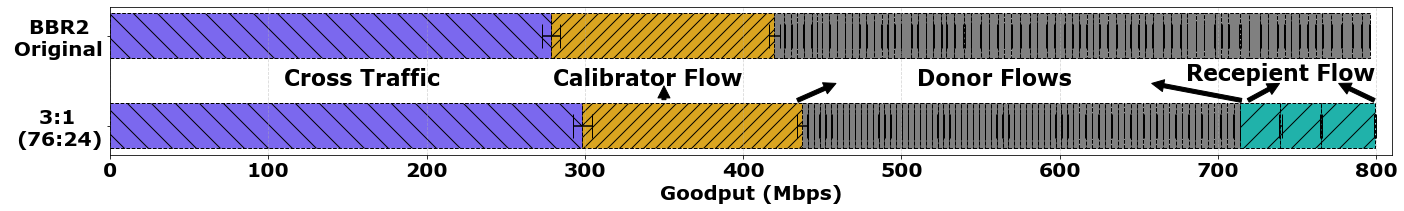

In [20]:
## Figure 23
means_all, stds_all, ratios_all = read_fshaper_npz("data/us_fshaper_bbr2_0816.npz")
N = 2
ind = np.arange(N)
width = 0.25
types = ['/', '\'', '|', '-', '+', 'x', 'o', 'O', '.', '*']

fig = plt.figure(figsize=(20, 3.4))
# fig.subplots_adjust(left=0.115, right=0.88)
ax = fig.add_subplot(1,1,1)
pls = []
ax.set_xlim([0, 98])

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

means_all_10, means_all_25, means_all_20_s, means_all_cubic = means_all
stds_all_10, stds_all_25, stds_all_20_s, stds_all_cubic = stds_all
ratio_all_10, ratio_all_25, ratio_all_20_s, ratio_all_cubic = ratios_all

for i in range(means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    if i >= 70:
        break
    elif i == 1:
        hatch_type = '//'
        color_type = '#DAA520'
    elif i == 0:
        hatch_type = '\\'
        color_type = '#7B68EE'

    p1 = ax.barh(ind, [means_all_25[i], means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_25[:i]), np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_25[i], stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)

for i in range(70, means_all_10.shape[0]):
    hatch_type = None
    color_type = '0.5'
    p1 = ax.barh([1], [means_all_cubic[i]], 
                 height=0.5, align='center',
                 left=[np.sum(means_all_cubic[:i])], 
                 xerr=[stds_all_cubic[i]], 
                 ls='--', hatch=hatch_type, 
                 color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 76:
        hatch_type = '/'
        color_type = '#20B2AA'
    #p1 = ax.barh([0], [means_all_10[i]], 
    #        height=0.5, align='center',
    #        left=[np.sum(means_all_10[:i])], 
    #        xerr=[stds_all_10[i]], 
    #        ls='--', hatch=hatch_type, 
    #        color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 74:
        hatch_type = '/'
        color_type = '#20B2AA'
    p1 = ax.barh([0], [means_all_25[i]], 
            height=0.5, align='center',
            left=[np.sum(means_all_25[:i])], 
            xerr=[stds_all_25[i]], 
            ls='--', hatch=hatch_type, 
            color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    if i >= 72:
        hatch_type = '/'
        color_type = '#20B2AA'
    #p1 = ax.barh([1], [means_all_20_s[i]], 
    #        height=0.5, align='center',
    #        left=[np.sum(means_all_20_s[:i])], 
    #        xerr=[stds_all_20_s[i]], 
    #        ls='--', hatch=hatch_type, 
    #        color=color_type, edgecolor='black', error_kw=dict(capsize=12))
    pls.append(p1)
    

ax.annotate('Cross Traffic', xy=(110, 0.45), weight='bold', clip_on=True)

ax.annotate('', xy=(350, 0.45), xytext=(350, 0.28), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Calibrator Flow', xy=(280, 0.45), weight='bold', clip_on=True)

recepient_flow = (680, 0.5)
ax.annotate('Recepient Flow', xy=recepient_flow, weight='bold', clip_on=True)
ax.annotate('', xy=(740, 0.48), xytext=(718, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(775, 0.48), xytext=(800, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Donor Flows', xy=(510, 0.45), weight='bold', clip_on=True)
#ax.annotate('', xy=(440, 0.55), xytext=(418, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('', xy=(680, 0.55), xytext=(718, 0.73), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(460, 0.48), xytext=(433, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(655, 0.48), xytext=(718, 0.27), arrowprops=dict(facecolor='black', shrink=0.05))

ax.xaxis.grid(True, linestyle="--", alpha=0.5)
ax.set_xlabel('Goodput (Mbps)', fontsize=20, fontweight='bold')
plt.yticks(ind, ('3:1    \n(76:24)', 'BBR2  \n Original'), weight='bold', fontsize=20) 
plt.xticks(np.arange(0, 8e2+1e1, 1e2), weight='bold', fontsize=20)
plt.xlim([0, 810])
plt.tight_layout()
#plt.savefig('US_bbr2_wired_2.pdf', format='pdf')
plt.show()

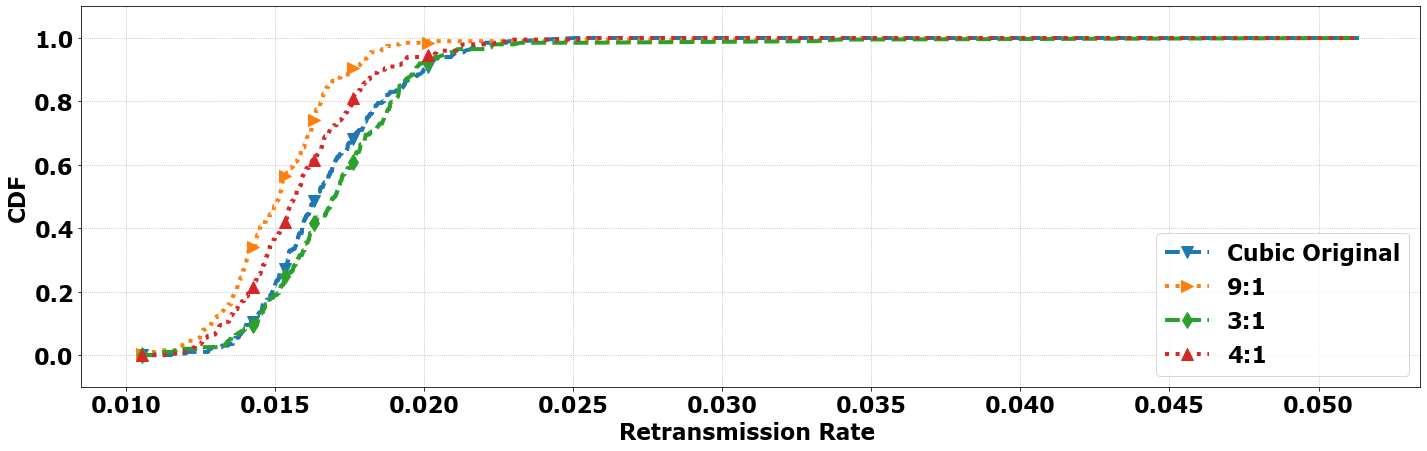

In [21]:
## Figure 25
styles = ['v--', '>:', 'd--', '^:', 's--', 'p:', 'D--', 'H:']
def plot_cdf(plot_set):
    plt.figure(figsize=(24,7))
    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.weight': 'bold'})
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Verdana'})
    plt.rcParams.update({'pdf.fonttype': 42})
    plt.rcParams.update({'ps.fonttype': 42})
    i = 0
    data_set = []
    for k, data in plot_set.items():
        data_set += list(data)
    data_set = sorted(set(data_set))
    bins = np.append(data_set, data_set[-1]+1)
    #print(bins)
    for k, data in plot_set.items():
        data_size = len(data)

        counts, bin_edges = np.histogram(data, bins=bins, density=False)
        counts = counts.astype(float)/data_size

        cdf = np.cumsum(counts)
        plt.plot(bin_edges[0:-1], cdf, styles[i], markevery=150, lw=4, ms=12, label=k)
        i += 1
    plt.ylim((-0.1, 1.1))
    plt.ylabel("CDF", fontsize=22, fontweight='bold')
    plt.xlabel("Retransmission Rate ", fontsize=22, fontweight='bold')
    #plt.title("GCP Tokyo with TW xTraffic", fontsize=22, fontweight='bold')
    plt.legend(fontsize=22)
    plt.grid(linestyle=":")
    #plt.savefig('retrans.pdf', format='pdf')
    plt.show()

data = np.load("data/reTx_w_cal_05s_1123.npz")
rxRates_cubic = data['rxRates_cubic']
rxRates_case1 = data['rxRates_case1']
rxRates_case2 = data['rxRates_case2']
rxRates_case3 = data['rxRates_case3']

plot_set = {}
plot_set["Cubic Original"] = rxRates_cubic
plot_set["9:1"] = rxRates_case1
plot_set["3:1"] = rxRates_case2
plot_set["4:1"] = rxRates_case3
plot_cdf(plot_set)

## FlowTele evaluation

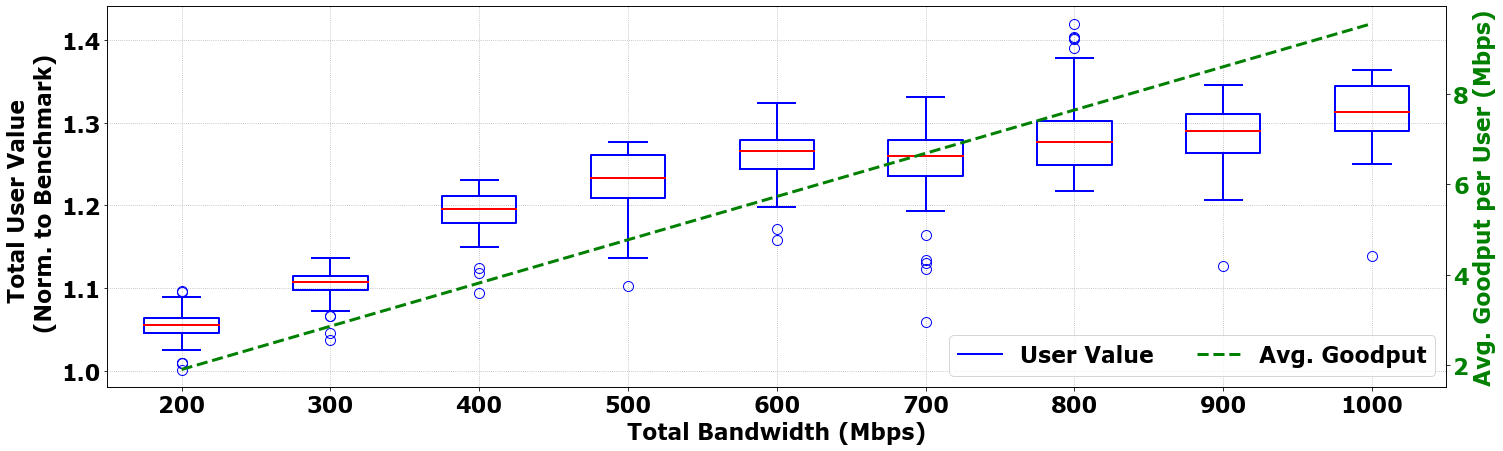

In [15]:
## Figure 11 (a)
data = np.load("data/diff_bottleneck.npz", allow_pickle=True)
improved_ratios = data['improved_ratios'].T
totals = data['totals']
run = data['run']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(improved_ratios, boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=2.0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'))
ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
ax.set_xlabel("Total Bandwidth (Mbps)", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(np.arange(len(run))+1, run, fontsize=22)
#plt.ylim([1.1, 1.3])

ax2 = ax.twinx()
ax2.set_ylabel('Avg. Goodput per User (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i for i in range(1, len(totals)+1)], np.array(totals)/100.0, 'g--', lw=3)
plt.yticks(fontsize=22, color='g')

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Avg. Goodput'], 
           loc='lower right', ncol=2)

#plt.savefig('diff_bottleneck.pdf', format='pdf')
plt.show()

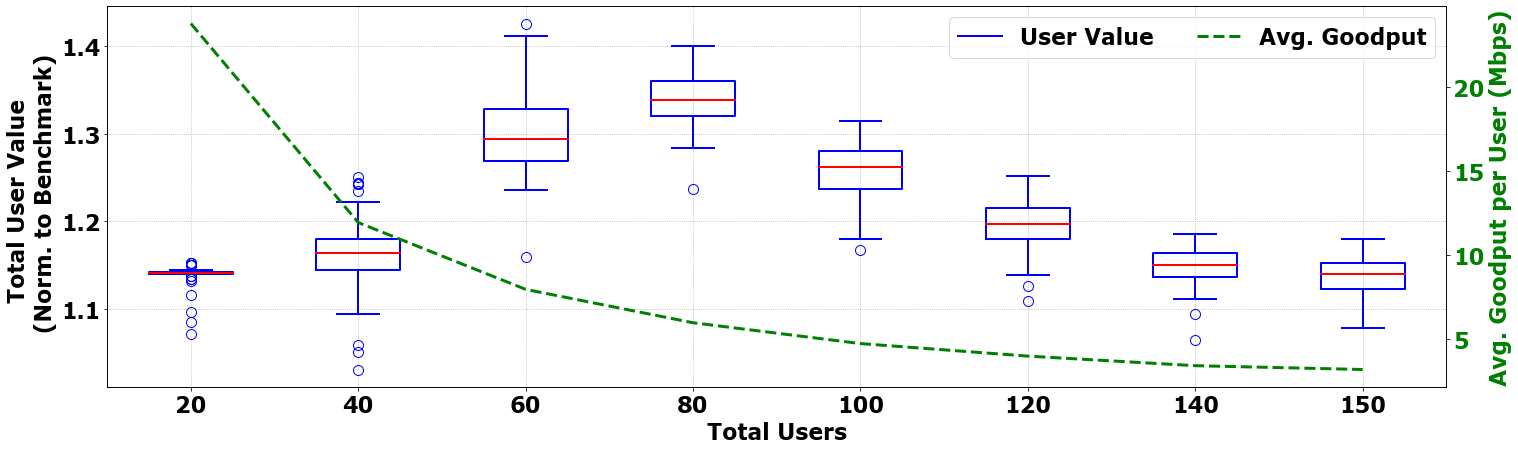

In [16]:
## Figure 11 (b)
data = np.load("data/diff_flows.npz", allow_pickle=True)
improved_ratios = data['improved_ratios'].T
norm_totals = data['norm_totals']
run = data['run']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(improved_ratios, boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=2.0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'))
ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
ax.set_xlabel("Total Users", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(np.arange(len(run))+1, run, fontsize=22)
#plt.ylim([1.1, 1.3])

ax2 = ax.twinx()
ax2.set_ylabel('Avg. Goodput per User (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i for i in range(1, len(norm_totals)+1)], norm_totals, 'g--', lw=3)
plt.yticks(fontsize=22, color='g')

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Avg. Goodput'], 
           loc='upper right', ncol=2)

#plt.savefig('diff_flows.pdf', format='pdf')
plt.show()

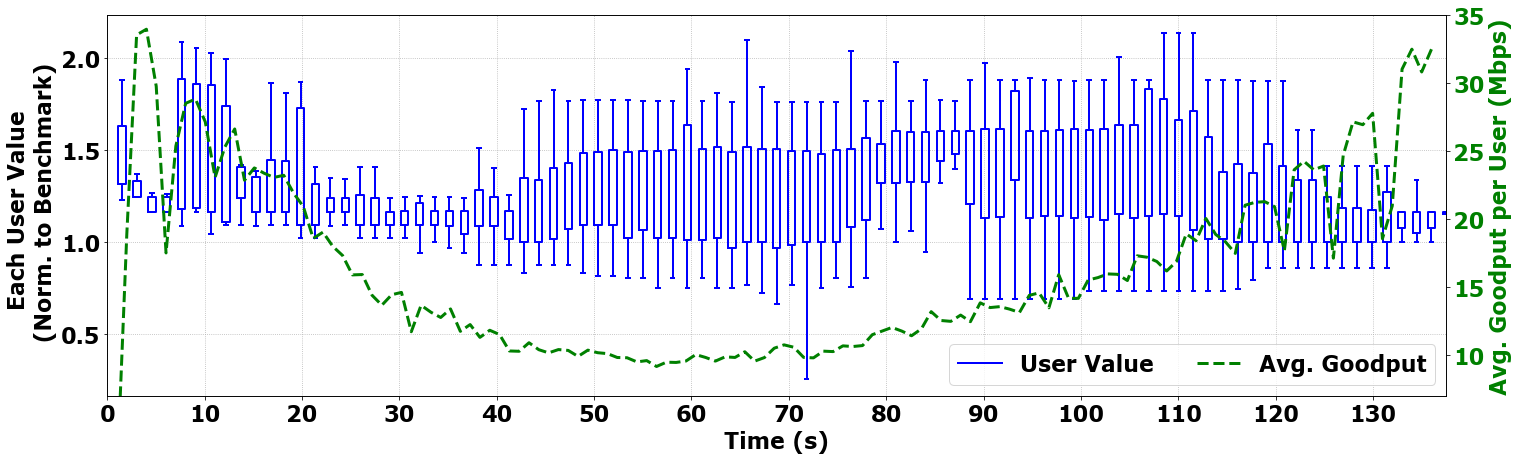

In [18]:
## Figure 11 (c)
data = np.load("data/seq_join.npz", allow_pickle=True)
impsTime = data['impsTime'].T
totals = data['totals']
counts = data['counts']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(impsTime[:], boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'), showfliers=False)
ax.set_ylabel('Each User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xlim([0, 90])

ax2 = ax.twinx()
ax2.set_ylabel('Avg. Goodput per User (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i*89/len(totals[1:]) for i in range(1, len(totals[1:])+1)], 
               totals[1:]/counts[1:], 'g--', lw=3)
plt.yticks(fontsize=22, color='g')
plt.xticks(np.arange(0, 89, 890/136), np.arange(0, 136, 10), fontsize=22)
plt.ylim([7, 35])

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Avg. Goodput'], 
           loc='lower right', ncol=2)
#plt.savefig('seq_join.pdf', format='pdf')
plt.show()

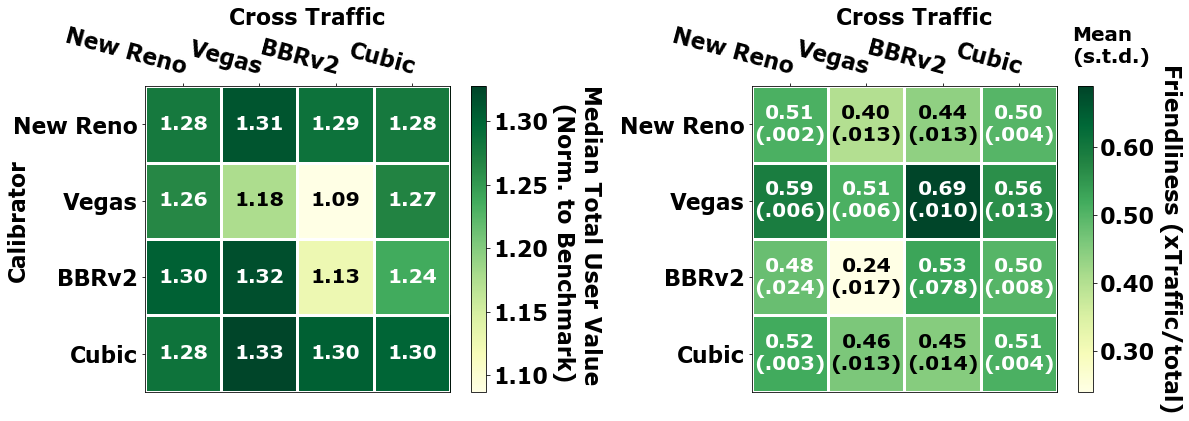

In [42]:
## Figure 12 (a)
data = np.load("data/diff_cca.npz", allow_pickle=True)
improved_ratios_reno = data['improved_ratios_reno']
improved_ratios_reno_vegas = data['improved_ratios_reno_vegas']
improved_ratios_reno_bbr2 = data['improved_ratios_reno_bbr2']
improved_ratios_reno_cubic = data['improved_ratios_reno_cubic']
improved_ratios_vegas_reno = data['improved_ratios_vegas_reno']
improved_ratios_vegas = data['improved_ratios_vegas']
improved_ratios_vegas_bbr2 = data['improved_ratios_vegas_bbr2']
improved_ratios_vegas_cubic = data['improved_ratios_vegas_cubic']
improved_ratios_bbr2_reno = data['improved_ratios_bbr2_reno']
improved_ratios_bbr2_vegas = data['improved_ratios_bbr2_vegas']
improved_ratios_bbr2 = data['improved_ratios_bbr2']
improved_ratios_bbr2_cubic = data['improved_ratios_bbr2_cubic']
improved_ratios_cubic_reno = data['improved_ratios_cubic_reno']
improved_ratios_cubic_vegas = data['improved_ratios_cubic_vegas']
improved_ratios_cubic_bbr2 = data['improved_ratios_cubic_bbr2']
improved_ratios_cubic = data['improved_ratios_cubic']

vegetables = ["New Reno", "Vegas", "BBRv2", "Cubic"]
farmers = ["New Reno", "Vegas", "BBRv2", "Cubic"]

harvest = np.array([[0.51, 0.40, 0.44, 0.50],
                    [0.59, 0.51, 0.69, 0.56],
                    [0.48, 0.24, 0.53, 0.50],
                    [0.52, 0.46, 0.45, 0.51]])
ttt = np.array([["(.002)", "(.013)", "(.013)", "(.004)"], 
                ["(.006)", "(.006)", "(.010)", "(.013)"],
                ["(.024)", "(.017)", "(.078)", "(.008)"],
                ["(.003)", "(.013)", "(.014)", "(.004)"]])

harvest2 = np.array([[np.median(improved_ratios_reno[0]), np.median(improved_ratios_reno_vegas[0]), 
                      np.median(improved_ratios_reno_bbr2[0]), np.median(improved_ratios_reno_cubic[0])],
                     [np.median(improved_ratios_vegas_reno[0]), np.median(improved_ratios_vegas[0]), 
                      np.median(improved_ratios_vegas_bbr2[0]), np.median(improved_ratios_vegas_cubic[0])],
                     [np.median(improved_ratios_bbr2_reno[0]), np.median(improved_ratios_bbr2_vegas[0]), 
                      np.median(improved_ratios_bbr2[0]), np.median(improved_ratios_bbr2_cubic[0])],
                     [np.median(improved_ratios_cubic_reno[0]), np.median(improved_ratios_cubic_vegas[0]), 
                      np.median(improved_ratios_cubic_bbr2[0]), np.median(improved_ratios_cubic[0])]])

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(17,6))

im, cbar = heatmap(harvest2, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="Median Total User Value \n (Norm. to Benchmark)",
                   xlabel="Run Number", degree=-15, ylabel="")
texts = annotate_heatmap(im, valfmt="{x:.2f}")

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax2,
                   cmap="YlGn", cbarlabel="Friendliness (xTraffic/total)",
                   xlabel="Run Number", degree=-15, ylabel="")
texts = annotate_heatmap(im, valfmt="{x:.2f}\n", hasStd = True, std=ttt)

ax.text(0.6, -1.3, 'Cross Traffic', fontsize=22)
ax2.text(3.7, -0.8, 'Mean\n(s.t.d.)')
ax2.text(0.6, -1.3, 'Cross Traffic', fontsize=22)
ax.text(-2.3, 2, 'Calibrator', rotation=90, fontsize=22)
#ax2.text(-2.3, 2, 'Calibrator', rotation=90, fontsize=22)

fig.tight_layout()
#plt.savefig('diff_cca.pdf', format='pdf')
plt.show()

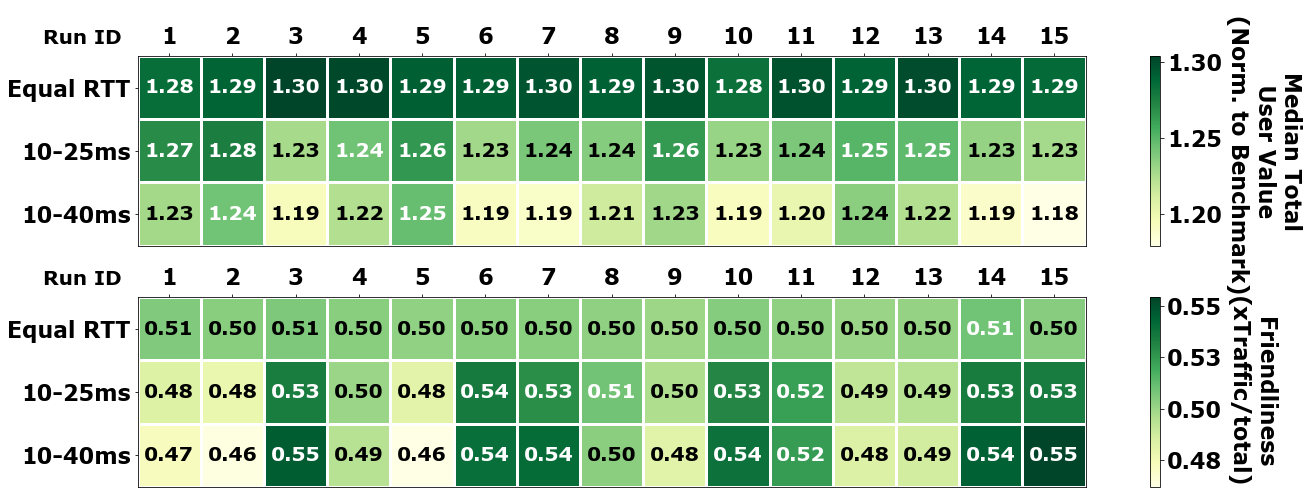

In [25]:
## Figure 12 (b)
data = np.load("data/diff_rtt_heatmap.npz", allow_pickle=True)
improved_ratios_1 = data['improved_ratios_1']
improved_ratios_2 = data['improved_ratios_2']
improved_ratios_3 = data['improved_ratios_3']
fairness1 = data['fairness1']
fairness2 = data['fairness2']
fairness3 = data['fairness3']

list0, list1, list2 = [], [], []
for a0, a1, a2 in zip(improved_ratios_3, improved_ratios_1, improved_ratios_2):
    list0.append(np.median(a0))
    list1.append(np.median(a1))
    list2.append(np.median(a2))
farmers = ["{}".format(i) for i in range(1, 16)]
vegetables = ["Equal RTT", "10-25ms", "10-40ms"]

harvest = np.array([list0, list1, list2])
harvest1 = np.array([fairness3, fairness1, fairness2])

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(20,7))

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="Median Total\n User Value \n (Norm. to Benchmark)",
                   ylabel="", xlabel="Run Number", degree=0)
texts = annotate_heatmap(im, valfmt="{x:.2f}")


im, cbar = heatmap(harvest1, vegetables, farmers, ax=ax2,
                   cmap="YlGn", cbarlabel="Friendliness\n(xTraffic/total)",
                   ylabel="", xlabel="Run Number", degree=0)
texts = annotate_heatmap(im, valfmt="{x:.2f}")

ax.text(-2, -0.7, 'Run ID')
ax2.text(-2, -0.7, 'Run ID')

fig.tight_layout()
#plt.savefig('diff_rtt_heatmap.pdf', format='pdf')
plt.show()

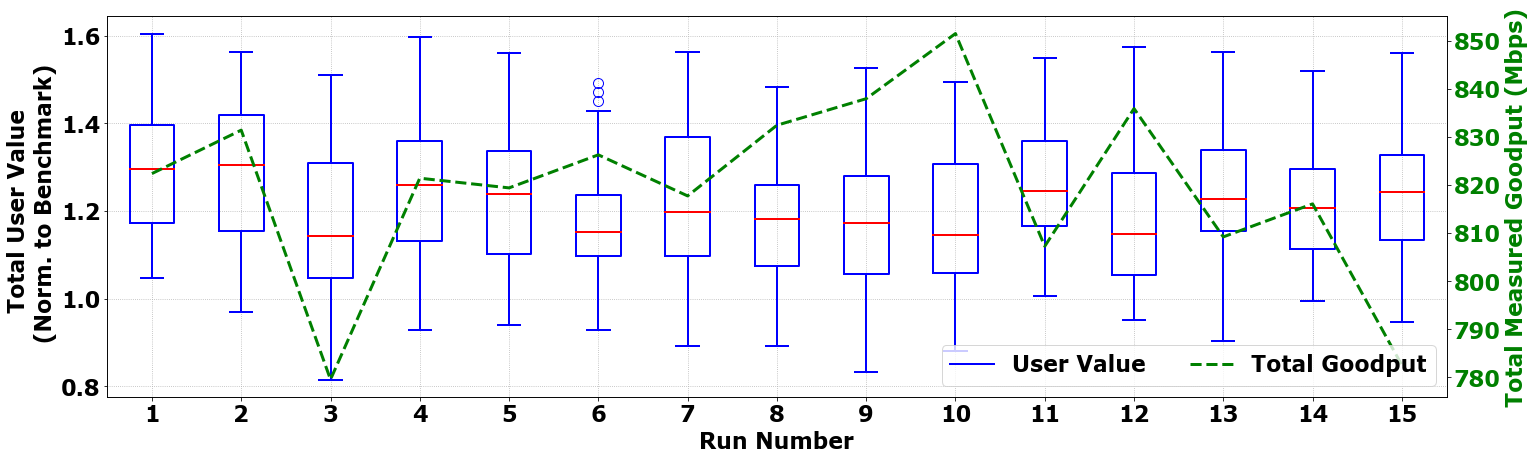

In [14]:
## Figure 13 (a)
data = np.load("data/vpn_real_traffic.npz", allow_pickle=True)
improved_ratios = data['improved_ratios'].T
totals = data['totals']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(improved_ratios, boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=2.0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'))
ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
ax.set_xlabel("Run Number", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(fontsize=22)
#plt.ylim([1.1, 1.3])

ax2 = ax.twinx()
ax2.set_ylabel('Total Measured Goodput (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i for i in range(1, 16)], totals, 'g--', lw=3)
#plt.ylim([0.0, 1.0])
plt.yticks(fontsize=22, color='g')

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Total Goodput'], 
           loc='lower right', ncol=2)

#plt.savefig('vpn_real_traffic.pdf', format='pdf')
plt.show()

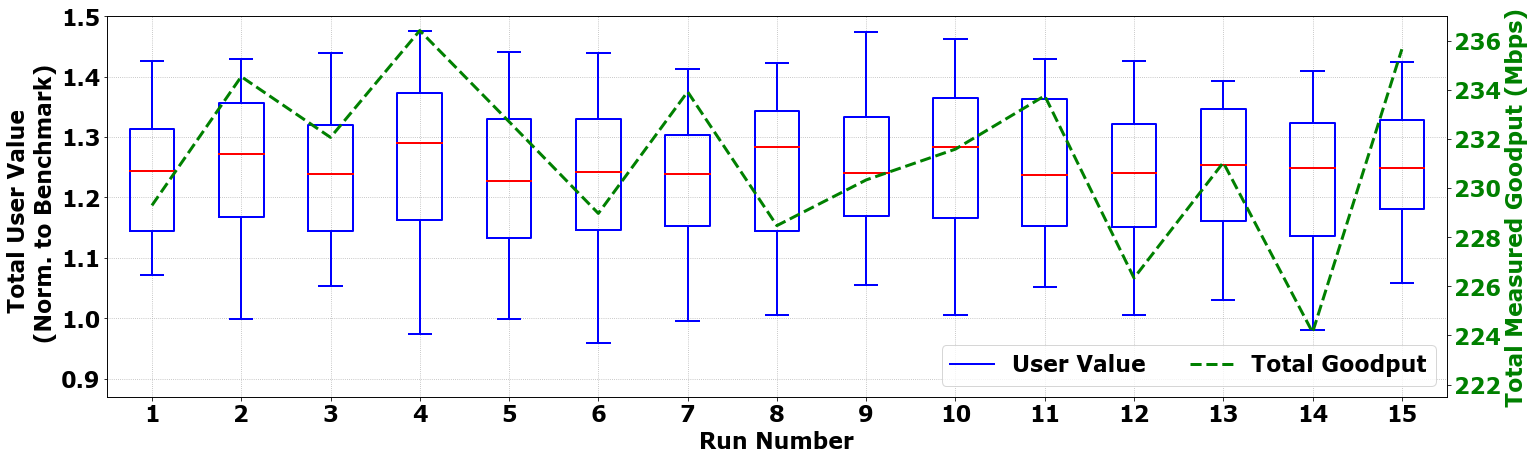

In [5]:
## Figure 13 (b)
data = np.load("data/variable_bottleneck.npz", allow_pickle=True)
improved_ratios = data['improved_ratios'].T
totals = data['totals']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(improved_ratios, boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=2.0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'))
ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
ax.set_xlabel("Run Number", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(fontsize=22)
plt.ylim([0.87, 1.5])

ax2 = ax.twinx()
#ax2.set_ylabel('Bandwidth Share', color='tab:blue', fontsize=22, fontweight='bold')
ax2.set_ylabel('Total Measured Goodput (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i for i in range(1, 16)], totals, 'g--', lw=3)
#bp3 = ax2.plot([i for i in range(1, 16)], fairness, 'g--', lw=3)
plt.ylim([221.5, 237])
plt.yticks(fontsize=22, color='g')

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Total Goodput'], 
           loc='lower right', ncol=2)

#plt.savefig('variable_bottleneck.pdf', format='pdf')
plt.show()

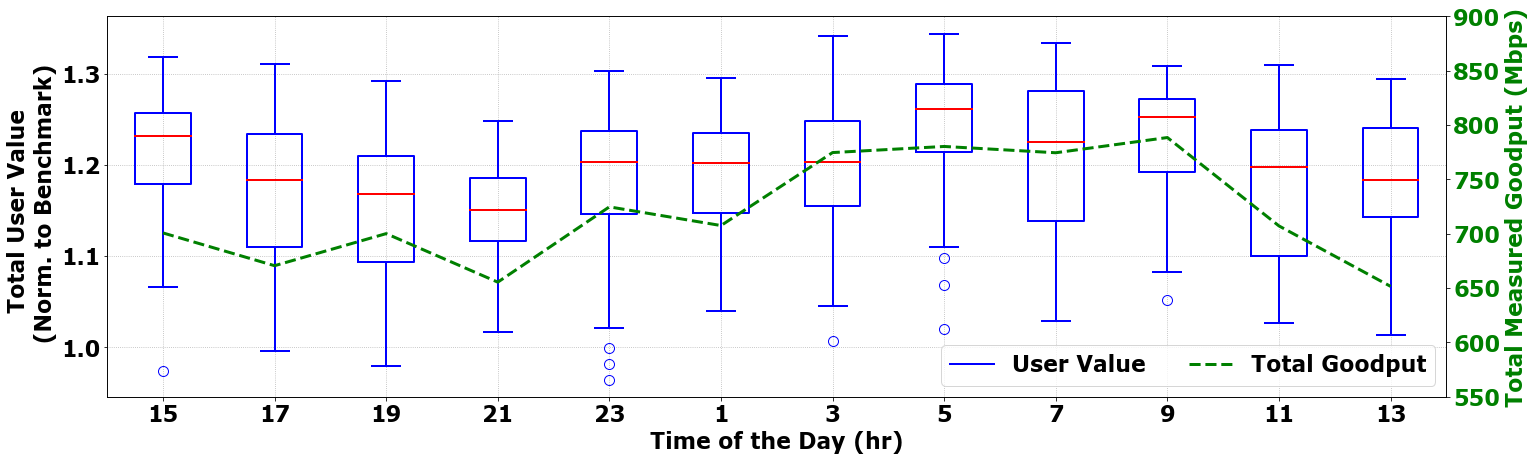

In [10]:
## Figure 14 (a)
data = np.load("data/isp_bottleneck.npz", allow_pickle=True)
improved_ratios = data['improved_ratios'].T
totals = data['totals']
run = data['run']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(improved_ratios, boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=2.0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'))
ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
ax.set_xlabel("Time of the Day (hr)", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(np.arange(len(run))+1, run, fontsize=22)
#plt.ylim([1.1, 1.3])

ax2 = ax.twinx()
ax2.set_ylabel('Total Measured Goodput (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i for i in range(1, len(totals)+1)], totals, 'g--', lw=3)
plt.ylim([550, 900])
plt.yticks(fontsize=22, color='g')

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Total Goodput'], 
           loc='lower right', ncol=2)

#plt.savefig('isp_bottleneck.pdf', format='pdf')
plt.show()

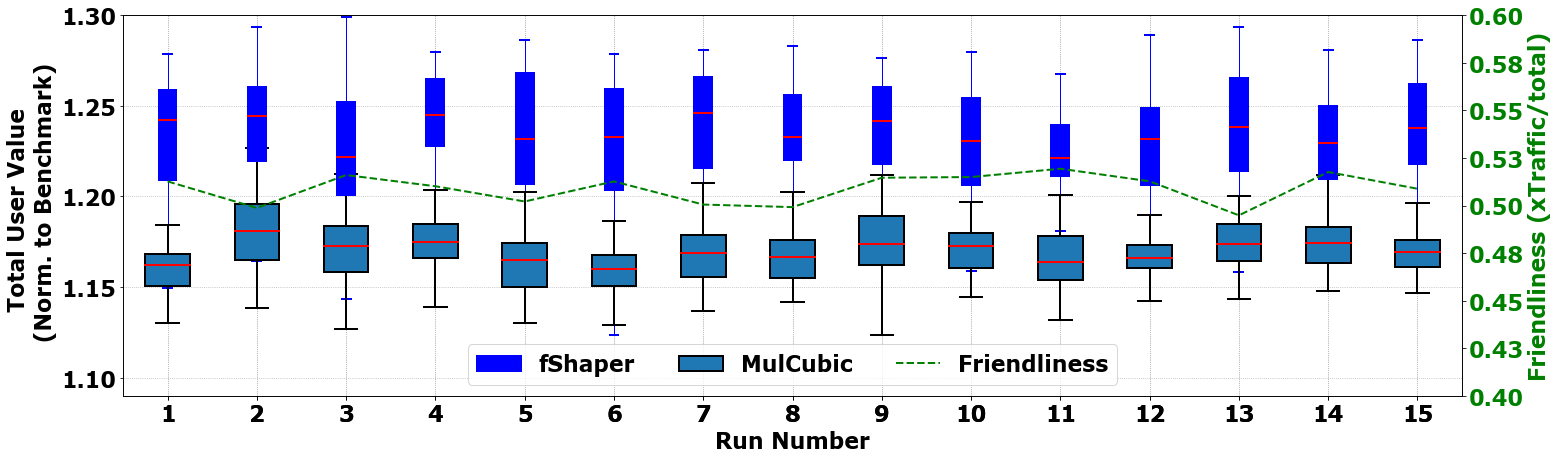

In [6]:
## Figure 14 (c)
data = np.load("data/mulcubic_fshaper.npz", allow_pickle=True)
improved_ratios = data['improved_ratios'].T
improved_ratios_m = data['improved_ratios_m'].T
fairness = data['fairness']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(improved_ratios, boxprops=dict(linewidth=2.0, facecolor='blue', color='blue'), showmeans=False,
            whiskerprops=dict(linewidth=1.0, color='blue'),
            medianprops=dict(linewidth=2.0, color='red'),
            capprops=dict(linewidth=2.0, color='blue'),
            flierprops=dict(marker='o', markersize=10,
                  linestyle='none', markeredgecolor='b'), showfliers=False, widths=0.2, patch_artist=True)
bp2 = ax.boxplot(improved_ratios_m, boxprops=dict(linewidth=2.0, facecolor="C0", color='black'), showmeans=False,
            whiskerprops=dict(linewidth=2.0, color='black'),
            medianprops=dict(linewidth=2.0, color='red'),
            capprops=dict(linewidth=2.0, color='black'),
            flierprops=dict(marker='*', markersize=10,
            linestyle='none', markeredgecolor='b'), showfliers=False, patch_artist=True,
            widths=0.5)
ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
ax.set_xlabel("Run Number", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(fontsize=22)
plt.ylim([1.09, 1.3])

ax2 = ax.twinx()
ax2.set_ylabel('Friendliness (xTraffic/total)', color='g', fontsize=22, fontweight='bold')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
bp3 = ax2.plot([i for i in range(1, 16)], fairness, 'g--', lw=2)
plt.ylim([0.4, 0.6])
plt.yticks(fontsize=22, color='g')

plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3[0]], ['fShaper', 'MulCubic', 'Friendliness'], 
           loc='lower center', ncol=3)
#plt.savefig('mulcubic_fshaper.pdf', format='pdf')
plt.show()

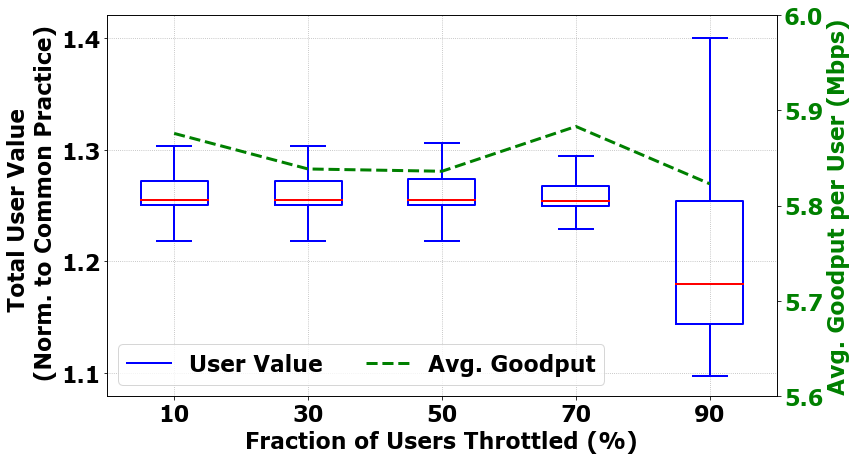

In [26]:
## Figure 15 (a)
data = np.load("data/prototype_diff_frac2.npz", allow_pickle=True)
improved_ratios = data['improved_ratios'].T
run = data['run']
totals = data['totals']

fig, ax = plt.subplots(figsize=(12, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(improved_ratios, boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=2.0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'), showfliers=False)
ax.set_ylabel('Total User Value \n (Norm. to Common Practice)', fontsize=22, fontweight='bold')
ax.set_xlabel("Fraction of Users Throttled (%)", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(np.arange(len(run))+1, run, fontsize=22)
plt.yticks([1.1, 1.2, 1.3, 1.4], [1.1, 1.2, 1.3, 1.4], fontsize=22)
plt.ylim([1.08, 1.42])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax2 = ax.twinx()
ax2.set_ylabel('Avg. Goodput per User (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i for i in range(1, len(totals)+1)], np.array(totals)/160.0, 'g--', lw=3)
plt.yticks(fontsize=22, color='g')
plt.ylim([5.6, 6.0])

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Avg. Goodput'], 
           loc='lower left', ncol=2)

#plt.savefig('prototype_diff_frac2.pdf', format='pdf')
plt.show()

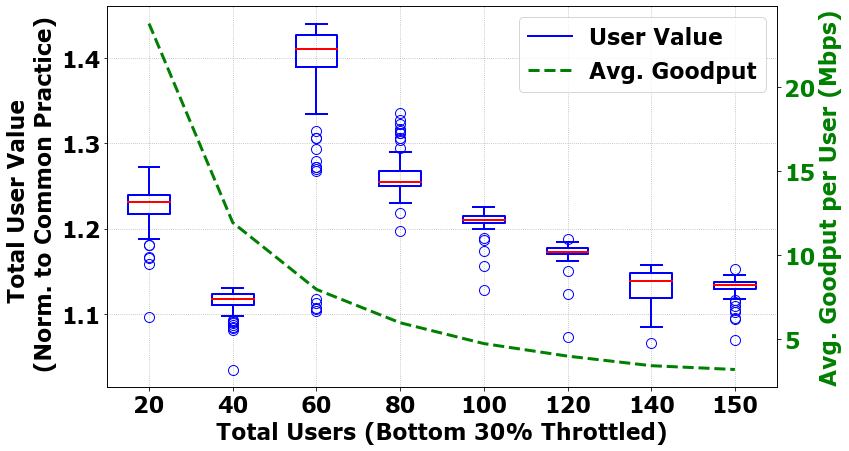

In [27]:
## Figure 15 (b)
data = np.load("data/prototype_diff_flows2.npz", allow_pickle=True)
improved_ratios = data['improved_ratios'].T
run = data['run']
norm_totals = data['norm_totals']

fig, ax = plt.subplots(figsize=(12, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(improved_ratios, boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=2.0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'))
ax.set_ylabel('Total User Value \n (Norm. to Common Practice)', fontsize=22, fontweight='bold')
ax.set_xlabel("Total Users (Bottom 30% Throttled)", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(np.arange(len(run))+1, run, fontsize=22)
#plt.ylim([1.1, 1.3])

ax2 = ax.twinx()
ax2.set_ylabel('Avg. Goodput per User (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i for i in range(1, len(norm_totals)+1)], norm_totals, 'g--', lw=3)
plt.yticks(fontsize=22, color='g')

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Avg. Goodput'], 
           loc='upper right', ncol=1)

#plt.savefig('prototype_diff_flows2.pdf', format='pdf')
plt.show()

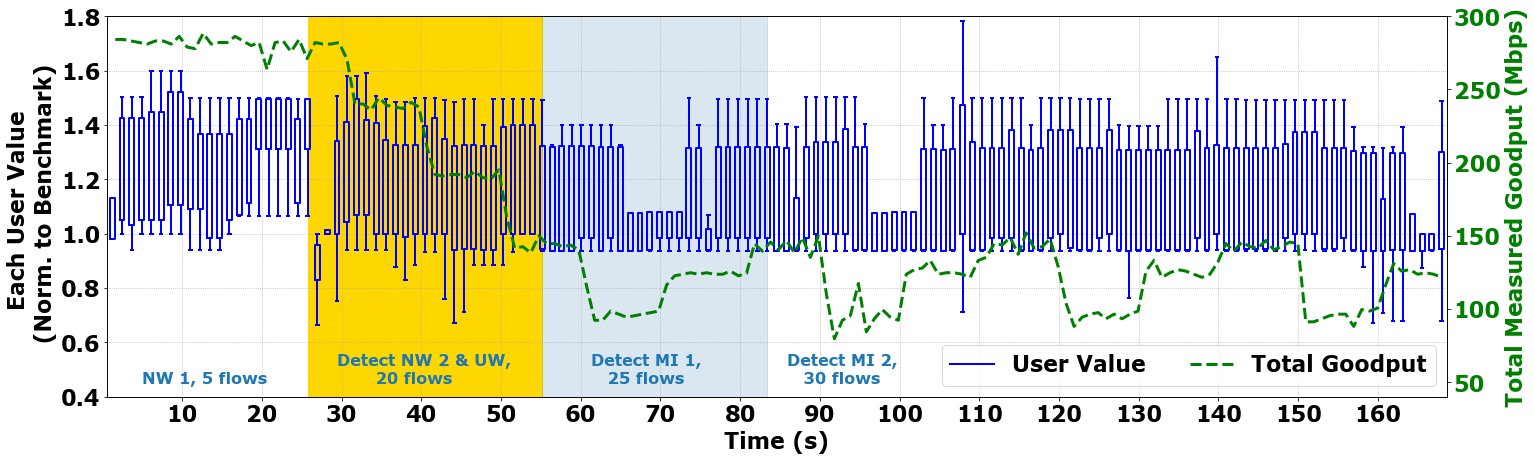

In [5]:
## Figure 17
data = np.load("data/pathneck_vFlowTele2.npz", allow_pickle=True)
impsTime = data['impsTime']
vv = data['vv']
records = data['records']
nLens = data['nLens']
nTraffic = data['nTraffic']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.boxplot(impsTime, boxprops=dict(linewidth=2.0, color='blue'), 
                whiskerprops=dict(linewidth=2.0, color='blue'),
                medianprops=dict(linewidth=0, color='red'),
                capprops=dict(linewidth=2.0, color='blue'),
                flierprops=dict(marker='o', markersize=10,
                      linestyle='none', markeredgecolor='b'), showfliers=False)
ax.set_ylabel('Each User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=22, fontweight='bold')
#plt.axvspan(0, records[1], color='brown', alpha=0.2, zorder=0)
plt.axvspan(records[1], records[2], color='gold', alpha=1.0, zorder=0)
plt.axvspan(records[2], records[3], color='steelblue', alpha=0.2, zorder=0)
#plt.axvspan(records[3], 138, color='limegreen', alpha=0.7, zorder=0)
plt.grid(linestyle=":")
plt.yticks(fontsize=22, color='k')
plt.ylim([0.4, 1.8])
#plt.xlim([0, 137.5])

ax.annotate('NW 1, 5 flows', xy=(4, 0.45), weight='bold', fontsize=16, color="tab:blue")
ax.annotate('Detect NW 2 & UW,\n       20 flows', xy=(24, 0.45), weight='bold', fontsize=16, color="tab:blue")
ax.annotate('Detect MI 1,\n   25 flows', xy=(50, 0.45), weight='bold', fontsize=16, color="tab:blue")
ax.annotate('Detect MI 2,\n   30 flows', xy=(70, 0.45), weight='bold', fontsize=16, color="tab:blue")

ax2 = ax.twinx()
ax2.set_ylabel('Total Measured Goodput (Mbps)', color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i*nLens/len(vv[1:]) for i in range(1, len(vv[1:])+1)], 
               vv[1:], 'g--', lw=3)
plt.yticks(fontsize=22, color='g')
plt.xticks(np.arange(0, nLens, nLens*10/nTraffic), np.arange(0, nTraffic, 10), fontsize=22)
plt.ylim([40, 300])

plt.legend([bp1["boxes"][0], bp3[0]], ['User Value', 'Total Goodput'], 
           loc='lower right', ncol=2)
#plt.savefig('pathneck_vFlowTele2.pdf', format='pdf')
plt.show()

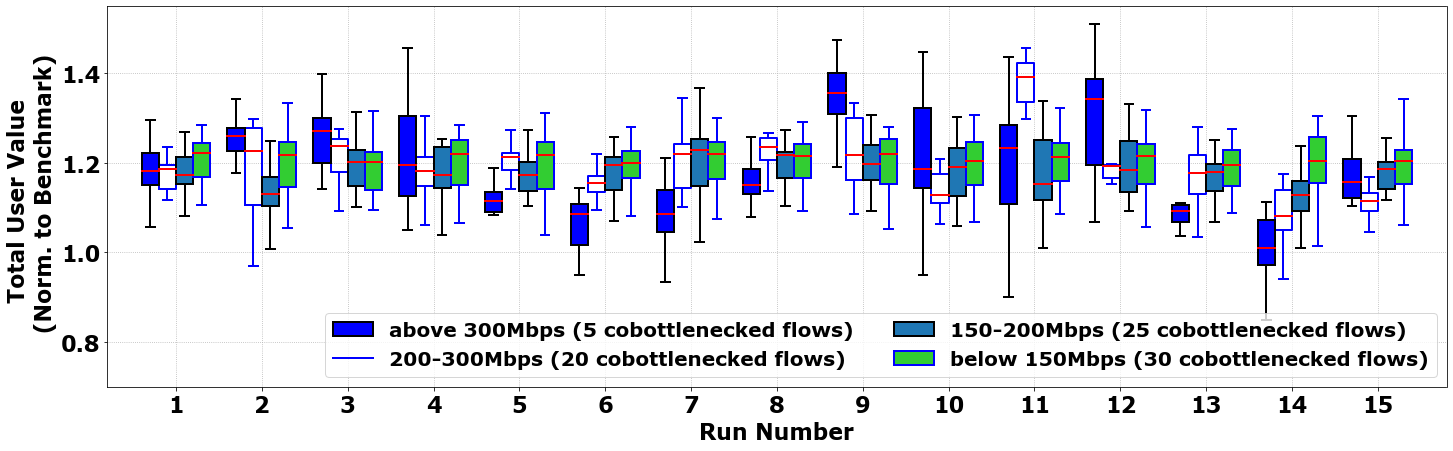

In [4]:
def plot_split_groups2(improved_ratios_groups, nRuns, poss, flowsDetected, filename=None):
    fig, ax = plt.subplots(figsize=(24, 7))
    #plt.figure()

    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.weight': 'bold'})
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Verdana'})
    plt.rcParams.update({'pdf.fonttype': 42})
    plt.rcParams.update({'ps.fonttype': 42})

    bp1 = ax.boxplot(improved_ratios_groups[0], boxprops=dict(linewidth=2.0, facecolor='blue', color='black'),
                     positions=[i-0.3 for i in range(1, 16)],
                    whiskerprops=dict(linewidth=2.0, color='black'),
                    medianprops=dict(linewidth=2.0, color='red'),
                    capprops=dict(linewidth=2.0, color='black'),
                    flierprops=dict(marker='o', markersize=10,
                            linestyle='none', markeredgecolor='b'), widths=0.2, showfliers=False, patch_artist=True)
    bp2 = ax.boxplot(improved_ratios_groups[1], boxprops=dict(linewidth=2.0, color='blue'), 
                     positions=[i-0.1 for i in range(1, 16)],
                    whiskerprops=dict(linewidth=2.0, color='blue'),
                    medianprops=dict(linewidth=2.0, color='red'),
                    capprops=dict(linewidth=2.0, color='blue'),
                    flierprops=dict(marker='o', markersize=10,
                            linestyle='none', markeredgecolor='b'), widths=0.2, showfliers=False)
    bp3 = ax.boxplot(improved_ratios_groups[2], boxprops=dict(linewidth=2.0, facecolor='C0', color='black'), 
                     positions=[i+0.1 for i in range(1, 16)],
                    whiskerprops=dict(linewidth=2.0, color='black'),
                    medianprops=dict(linewidth=2.0, color='red'),
                    capprops=dict(linewidth=2.0, color='black'),
                    flierprops=dict(marker='o', markersize=10,
                            linestyle='none', markeredgecolor='b'), widths=0.2, showfliers=False, patch_artist=True)
    bp4 = ax.boxplot(improved_ratios_groups[3], boxprops=dict(linewidth=2.0, facecolor='limegreen', color='blue'), 
                     positions=[i+0.3 for i in range(1, 16)],
                    whiskerprops=dict(linewidth=2.0, color='blue'),
                    medianprops=dict(linewidth=2.0, color='red'),
                    capprops=dict(linewidth=2.0, color='blue'),
                    flierprops=dict(marker='o', markersize=10,
                            linestyle='none', markeredgecolor='b'), widths=0.2, showfliers=False, patch_artist=True)
    ax.set_ylabel('Total User Value \n (Norm. to Benchmark)', fontsize=22, fontweight='bold')
    ax.set_xlabel("Run Number", fontsize=22, fontweight='bold')
    plt.xticks([i for i in range(1, 16)], [i for i in range(1, 16)])
    plt.grid(linestyle=":")
    plt.xticks(fontsize=22)
    plt.ylim([0.7, 1.55])

    plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0]], 
               ['above 300Mbps (5 cobottlenecked flows)', '200-300Mbps (20 cobottlenecked flows)', 
                '150-200Mbps (25 cobottlenecked flows)', 'below 150Mbps (30 cobottlenecked flows)'], 
                loc='lower right', ncol=2, fontsize=20)

    if filename != None:
        plt.savefig('{}.pdf'.format(filename), format='pdf')
    plt.show()

## Figure 17
data = np.load("data/pathneck_runs.npz", allow_pickle=True)
improved_ratios_groups = data['improved_ratios_groups']
nRuns = data['nRuns']
poss = data['poss']
flowsDetected2 = data['flowsDetected2']
plot_split_groups2(improved_ratios_groups, nRuns, poss, flowsDetected2)#, filename="pathneck_runs")

In [13]:
## Table 7
## original, fShaper, vAlloc
cpu_200 = [[27.36, 26.83, 27.97], [33.33, 32.89, 32.05], [47.26, 49.30, 47.88]]
cpu_100 = [[23.89, 24.48, 28.02], [30.05, 31.11, 30.09], [48.23, 50.00, 48.61]]
cpu_50 = [[25.89, 26.80, 26.83], [25.24, 24.33, 24.69], [49.62, 46.08, 48.85]]
cpu_20 = [[26.73, 23.65, 23.76], [23.60, 26.70, 26.86], [48.25, 47.50, 48.81]]
cpu_10 = [[25.64, 26.24, 26.04], [26.02, 26.36, 26.86], [47.14, 47.01, 46.49]]
print(np.diff(np.mean(cpu_200, axis=1)))
print(np.diff(np.mean(cpu_100, axis=1)))
print(np.diff(np.mean(cpu_50, axis=1)))
print(np.diff(np.mean(cpu_20, axis=1)))
print(np.diff(np.mean(cpu_10, axis=1)))

[ 5.37 15.39]
[ 4.95333333 18.53      ]
[-1.75333333 23.43      ]
[ 1.00666667 22.46666667]
[ 0.44       20.46666667]


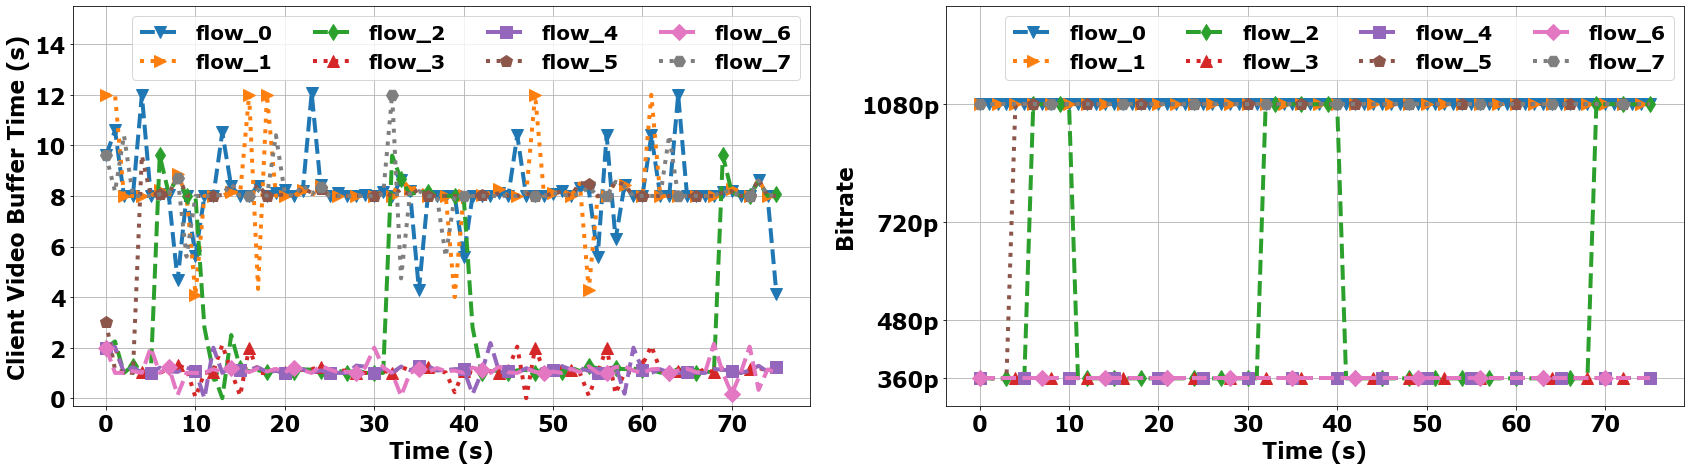

In [31]:
## Figure 19 (a)
data = np.load("data/buffer_time.npz", allow_pickle=True)
bw_rltimes_ary = data['bw_rltimes_ary']
bit_rates_ary = data['bit_rates_ary']
selections = data['selections']
bitrate_table = ([1, 2.5, 5, 8, 16, 40], ["360p", "480p", "720p", "1080p", "2K", "4K"])

styles = ['v--', '>:', 'd--', '^:', 's--', 'p:', 'D--', 'H:']
plt.figure(figsize=(24,7))

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

ax = plt.subplot(1,2,1)
for i, flow in enumerate(selections):
    ax.plot(bw_rltimes_ary[:76,flow], styles[i], 
            markevery=(i+1), lw=4, ms=12,
            label="flow_{}".format(i))
ax.set_ylabel("Client Video Buffer Time (s)", fontsize=22, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=22, fontweight='bold')
plt.legend(ncol=4, loc="upper right", fontsize=20)
plt.grid(":")
plt.ylim([-0.3, 15.5])

ax2 = plt.subplot(1,2,2)
for i, flow in enumerate(selections):
    ax2.plot(bit_rates_ary[:76,flow], styles[i], 
             markevery=(i+1), lw=4, ms=12,
            label="flow_{}".format(i))
ax2.set_ylabel("Bitrate", fontsize=22, fontweight='bold')
ax2.set_xlabel("Time (s)", fontsize=22, fontweight='bold')
plt.legend(ncol=4, loc="upper right", fontsize=20)
plt.grid(":")
plt.ylim([0.3, 10.5])
ax2.set_yticks(bitrate_table[0][0:4])
ax2.set_yticklabels(bitrate_table[1][0:4])

plt.tight_layout()

#plt.savefig("buffer_time.pdf", format='pdf')
plt.show()

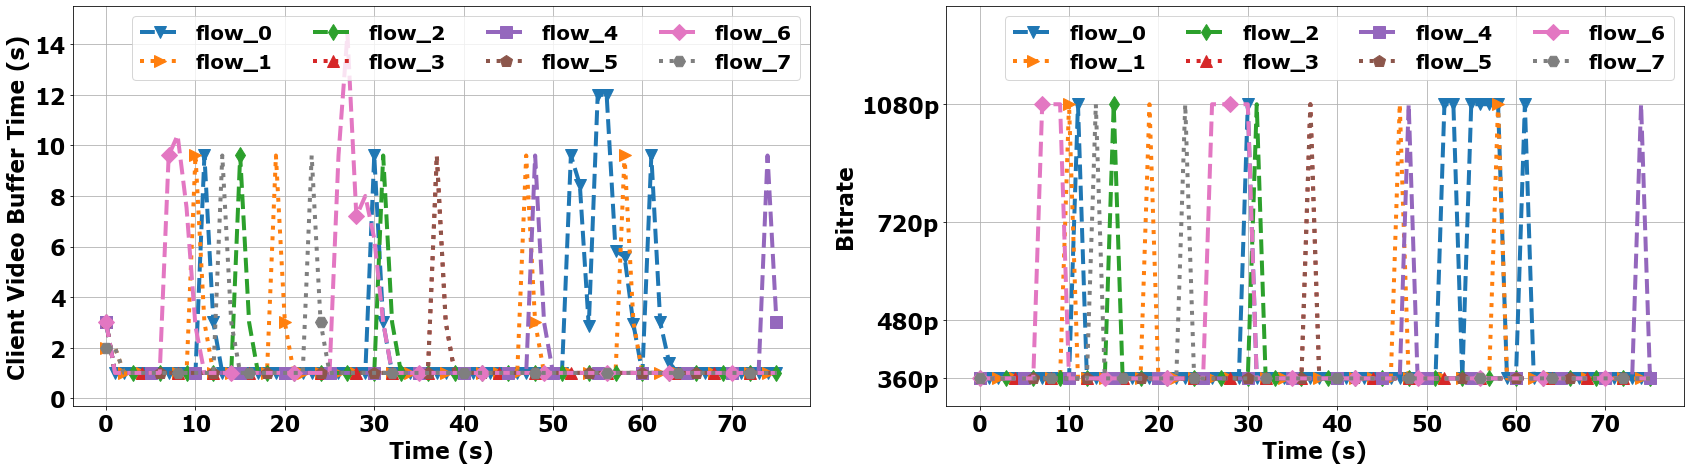

In [32]:
## Figure 19 (b)
data = np.load("data/buffer_time_calibrator.npz", allow_pickle=True)
bw_rltimes_ary = data['bw_rltimes_ary']
bit_rates_ary = data['bit_rates_ary']
selections = data['selections']
bitrate_table = ([1, 2.5, 5, 8, 16, 40], ["360p", "480p", "720p", "1080p", "2K", "4K"])
#selections = np.random.choice(60, 8, replace=False)

styles = ['v--', '>:', 'd--', '^:', 's--', 'p:', 'D--', 'H:']
plt.figure(figsize=(24,7))

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

ax = plt.subplot(1,2,1)
for i, flow in enumerate(selections):
    ax.plot(bw_rltimes_ary[:76,flow], styles[i], 
            markevery=(i+1), lw=4, ms=12,
            label="flow_{}".format(i))
ax.set_ylabel("Client Video Buffer Time (s)", fontsize=22, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=22, fontweight='bold')
plt.legend(ncol=4, loc="upper right", fontsize=20)
plt.grid(":")
plt.ylim([-0.3, 15.5])

ax2 = plt.subplot(1,2,2)
for i, flow in enumerate(selections):
    ax2.plot(bit_rates_ary[:76,flow], styles[i], 
             markevery=(i+1), lw=4, ms=12,
            label="flow_{}".format(i))
ax2.set_ylabel("Bitrate", fontsize=22, fontweight='bold')
ax2.set_xlabel("Time (s)", fontsize=22, fontweight='bold')
plt.legend(ncol=4, loc="upper right", fontsize=20)
plt.grid(":")
plt.ylim([0.3, 10.5])
ax2.set_yticks(bitrate_table[0][0:4])
ax2.set_yticklabels(bitrate_table[1][0:4])

plt.tight_layout()

#plt.savefig("buffer_time_calibrator.pdf", format='pdf')
plt.show()

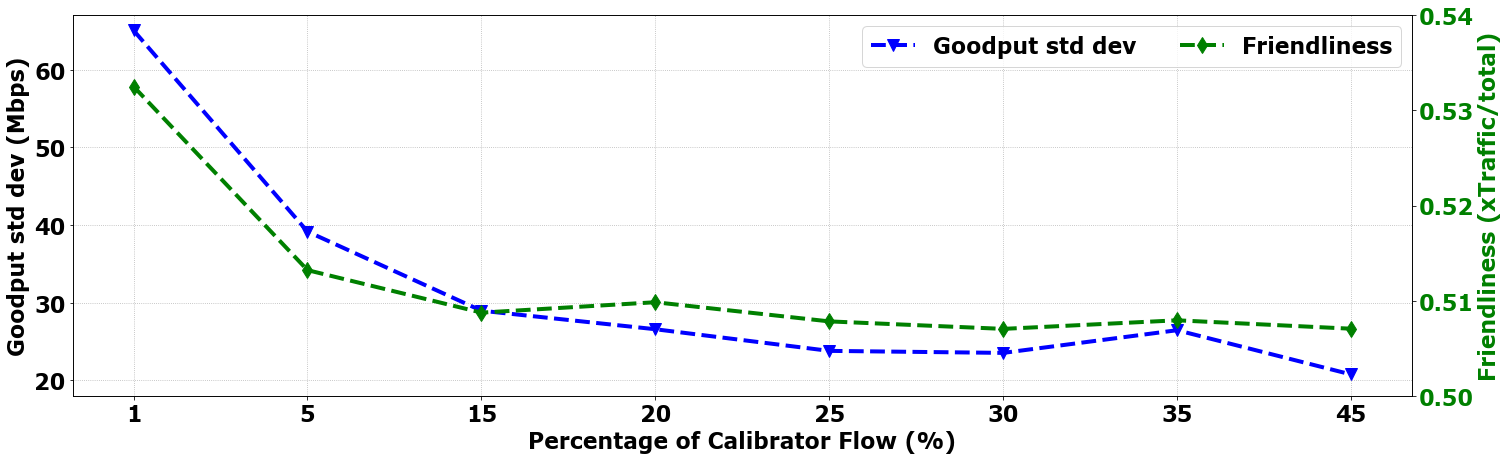

In [7]:
## Figure 24
data = np.load("data/diff_calibrator_dev.npz", allow_pickle=True)
improved_ratios_all = data['improved_ratios_all'].T
total_stds = data['total_stds']
p99_all = data['p99_all'].T
fairness_all = data['fairness_all']
percentages = [1, 5, 15, 20, 25, 30, 35, 45]

styles = ['v--', '>:', 'd--', '^:', 's--', 'p:', 'D--', 'H:']

fig, ax = plt.subplots(figsize=(24, 7))
#plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

bp1 = ax.plot([i for i in range(1, len(percentages)+1)], total_stds[:len(percentages)], 
              styles[0], markevery=1, lw=4, ms=12, color='b')
ax.set_ylabel('Goodput std dev (Mbps)', fontsize=22, fontweight='bold')
ax.set_xlabel("Percentage of Calibrator Flow (%)", fontsize=22, fontweight='bold')
plt.grid(linestyle=":")
plt.xticks(np.arange(len(percentages))+1, percentages, fontsize=22)
plt.yticks(fontsize=22)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.ylim([18, 67])

ax2 = ax.twinx()
ax2.set_ylabel("Friendliness (xTraffic/total)", color='g', fontsize=22, fontweight='bold')
bp3 = ax2.plot([i for i in range(1, len(percentages)+1)], fairness_all[:len(percentages)], 
               styles[2], markevery=1, lw=4, ms=12, color='g')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.yticks(fontsize=22, color='g')
plt.ylim([0.50, 0.54])

plt.legend([bp1[0], bp3[0]], ["Goodput std dev", "Friendliness"], 
               loc="upper right", ncol=2)

#plt.savefig("diff_calibrator_dev.pdf", format='pdf')
plt.show()

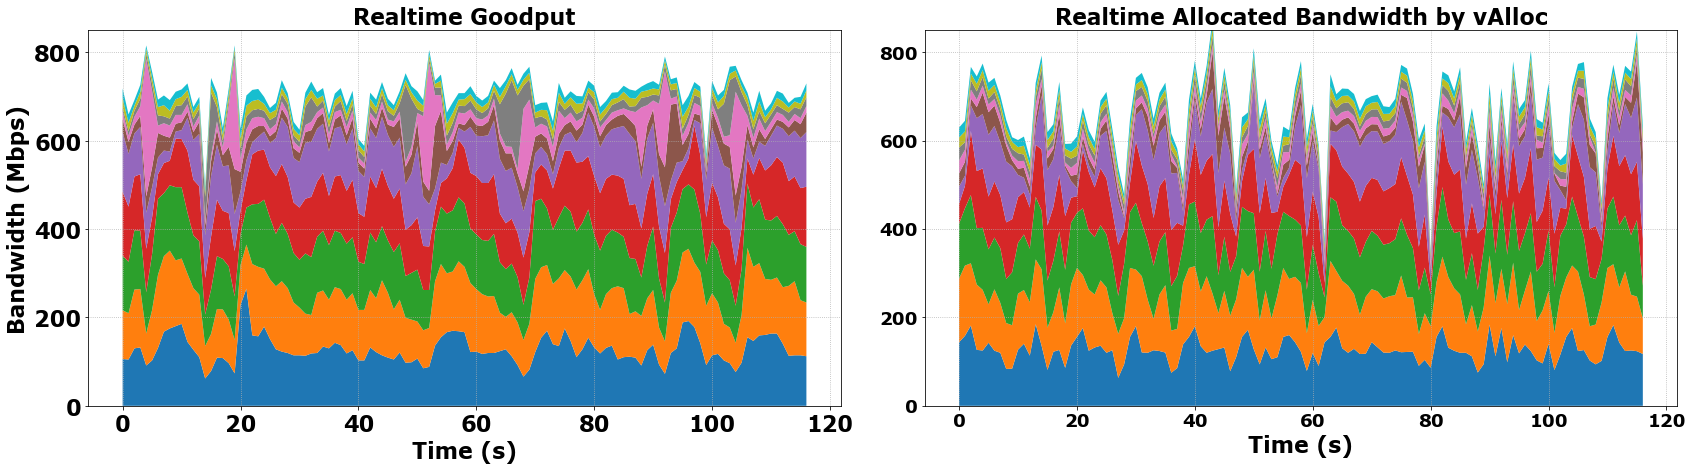

In [6]:
## Figure 27
data = np.load("data/integration_rt_goodput_1G.npz", allow_pickle=True)
gds_gp = data['gds_gp']
bw_rltime_gp = data['bw_rltime_gp']

fig, ax = plt.subplots(1, 2, figsize=(24, 7))

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

ax[0].stackplot([i for i in range(117)], gds_gp)
ax[0].grid(ls=':')
ax[0].set_ylabel("Bandwidth (Mbps)", fontsize=22, fontweight='bold')
ax[0].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
ax[0].set_title("Realtime Goodput", fontsize=22, fontweight='bold')
ax[1].stackplot([i for i in range(117)], bw_rltime_gp)
ax[1].grid(ls=':')
ax[1].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
ax[1].set_title("Realtime Allocated Bandwidth by vAlloc", fontsize=22, fontweight='bold')
ax[0].set_ylim([0, 850])
ax[1].set_ylim([0, 850])


#ax[0].annotate('Total bandwidth of all flows in the first decile', xy=(8, 20), weight='bold', clip_on=True)
#ax[0].annotate('second decile', xy=(85.5, 140), weight='bold', clip_on=True)
#ax[0].annotate('third decile', xy=(85.5, 250), weight='bold', clip_on=True)
#ax[0].annotate('fourth decile', xy=(85.5, 365), weight='bold', clip_on=True)
#ax[0].annotate('fifth decile', xy=(85.5, 395), weight='bold', clip_on=True)
#ax[0].annotate('sixth decile', xy=(85.5, 420), weight='bold', clip_on=True)
#ax[0].annotate('seventh decile', xy=(85.5, 520), weight='bold', clip_on=True)
#ax[0].annotate('', xy=(75, 432), xytext=(100, 518), arrowprops=dict(facecolor='black', shrink=0.05))

#ax[0].annotate('', xy=(123, 505), xytext=(145, 570), arrowprops=dict(facecolor='black', shrink=0.05))
#ax[0].annotate('', xy=(123, 490), xytext=(145, 545), arrowprops=dict(facecolor='black', shrink=0.05))
#ax[0].annotate('', xy=(123, 470), xytext=(145, 515), arrowprops=dict(facecolor='black', shrink=0.05))

#ax[1].annotate('eighth decile', xy=(-4, 498), weight='bold')
#ax[1].annotate('ninth decile', xy=(-4, 528), weight='bold')
#ax[1].annotate('last decile', xy=(-4, 558), weight='bold')

#ax[1].annotate('', xy=(33, 440), xytext=(26, 498), arrowprops=dict(facecolor='black', shrink=0.05))
#ax[1].annotate('', xy=(36, 460), xytext=(23, 528), arrowprops=dict(facecolor='black', shrink=0.05))
#ax[1].annotate('', xy=(41, 480), xytext=(19, 570), arrowprops=dict(facecolor='black', shrink=0.05))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
#plt.savefig('integration_rt_goodput_1G.pdf', format='pdf')
plt.show()

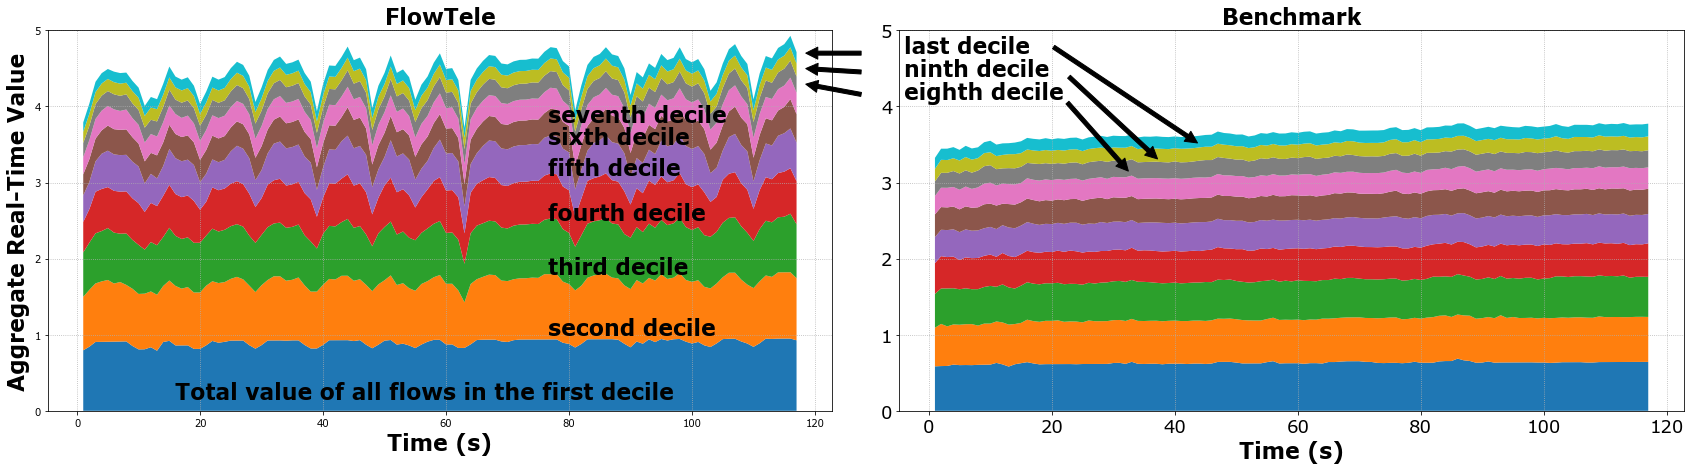

In [5]:
## Figure 28
data = np.load("data/realtime_value_annotated_1G.npz", allow_pickle=True)
value_rltime_print_gp = data['value_rltime_print_gp']
t = data['t']
value_rltime_ind_print_gp = data['value_rltime_ind_print_gp']

fig, ax = plt.subplots(1, 2, figsize=(24, 7))

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

ax[0].stackplot(t, value_rltime_print_gp)
ax[0].grid(ls=':')
ax[0].set_ylabel("Aggregate Real-Time Value", fontsize=22, fontweight='bold')
ax[0].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
ax[0].set_title("FlowTele", fontsize=22, fontweight='bold')


ax[0].annotate('Total value of all flows in the first decile', xy=(16, 0.15), weight='bold', clip_on=True)
ax[0].annotate('second decile', xy=(76.5, 1.0), weight='bold', clip_on=True)
ax[0].annotate('third decile', xy=(76.5, 1.8), weight='bold', clip_on=True)
ax[0].annotate('fourth decile', xy=(76.5, 2.5), weight='bold', clip_on=True)
ax[0].annotate('fifth decile', xy=(76.5, 3.1), weight='bold', clip_on=True)
ax[0].annotate('sixth decile', xy=(76.5, 3.5), weight='bold', clip_on=True)
ax[0].annotate('seventh decile', xy=(76.5, 3.8), weight='bold', clip_on=True)

ax[0].annotate('', xy=(118, 4.7), xytext=(128, 4.7), arrowprops=dict(facecolor='black', shrink=0.05))
ax[0].annotate('', xy=(118, 4.5), xytext=(128, 4.45), arrowprops=dict(facecolor='black', shrink=0.05))
ax[0].annotate('', xy=(118, 4.3), xytext=(128, 4.15), arrowprops=dict(facecolor='black', shrink=0.05))

ax[1].stackplot(t, value_rltime_ind_print_gp)
ax[1].grid(ls=':')
ax[1].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
ax[1].set_title("Benchmark", fontsize=22, fontweight='bold')
ax[0].set_ylim([0, 5.0])
ax[1].set_ylim([0, 5.0])

ax[1].annotate('eighth decile', xy=(-4, 4.1), weight='bold')
ax[1].annotate('ninth decile', xy=(-4, 4.4), weight='bold')
ax[1].annotate('last decile', xy=(-4, 4.7), weight='bold')

ax[1].annotate('', xy=(33, 3.1), xytext=(22, 4.1), arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].annotate('', xy=(38, 3.25), xytext=(22, 4.45), arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].annotate('', xy=(45, 3.45), xytext=(19, 4.85), arrowprops=dict(facecolor='black', shrink=0.05))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
#plt.savefig('realtime_value_annotated_1G.pdf', format='pdf')
plt.show()

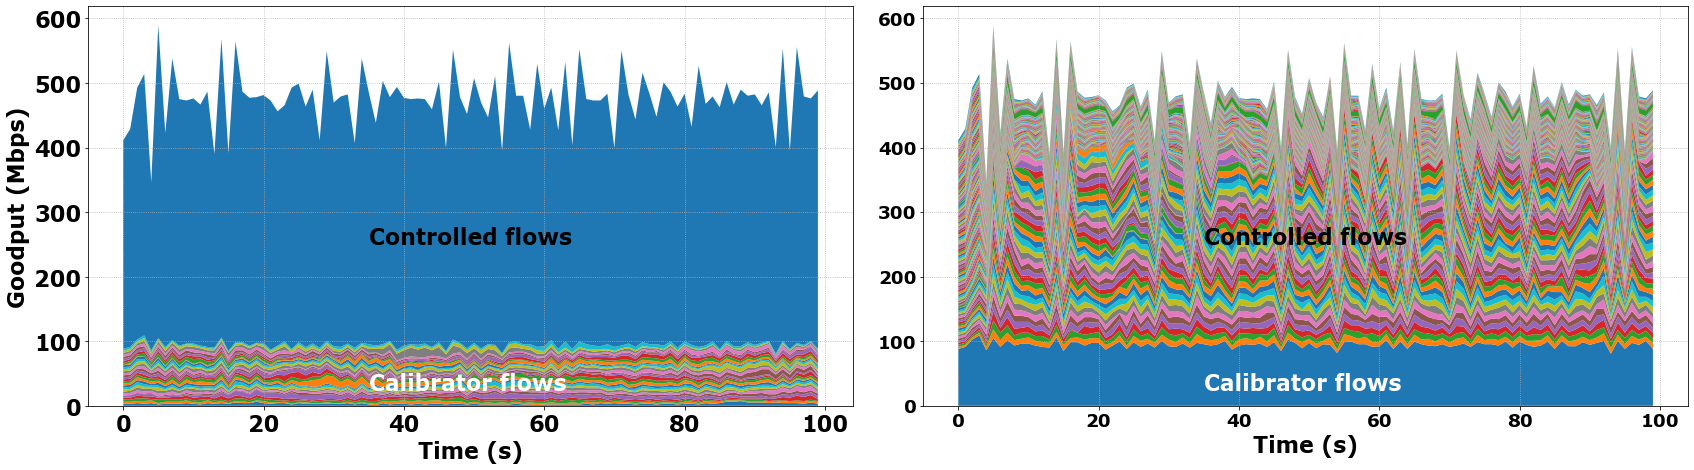

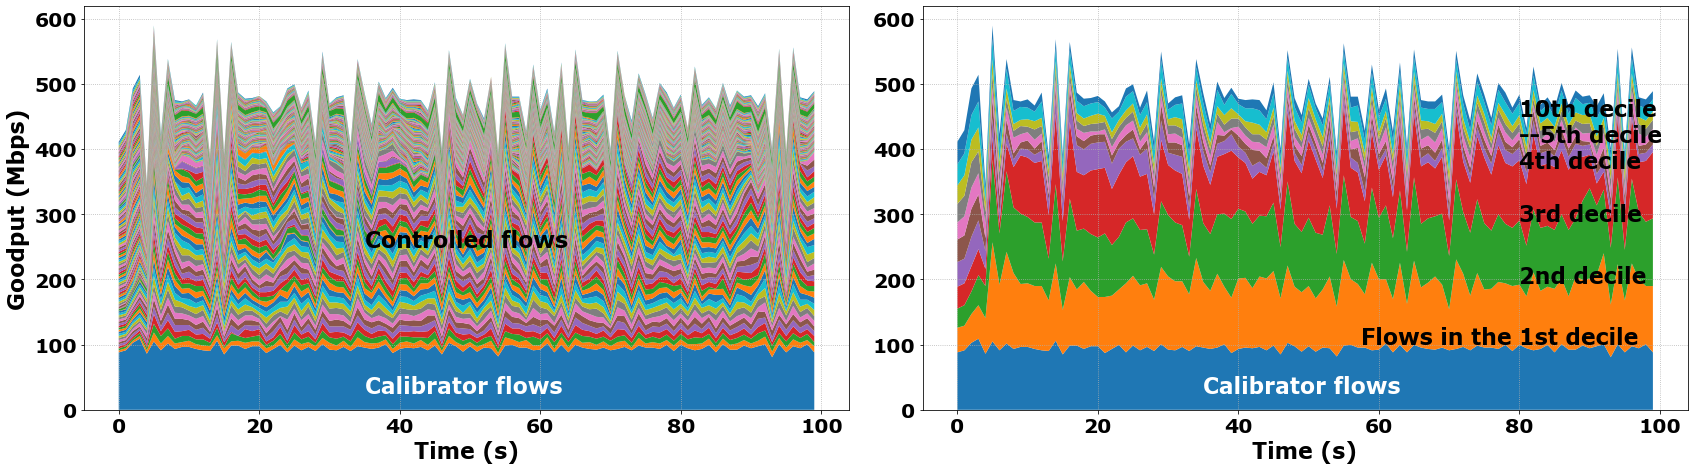

1st: 97.70 Mbps, 2nd: 94.98 Mbps, 3rd: 80.31 Mbps, 4th: 19.85 Mbps, 5th: 14.56 Mbps, 6th: 14.08 Mbps, 7th: 13.64 Mbps, 8th: 13.37 Mbps, 9th: 20.41 Mbps, 10th: 13.54 Mbps, 


In [19]:
## PPT figures
data = np.load("data/goodput_sort_by_value2.npz", allow_pickle=True)
value = data['value']
realtim_goodputs = data['realtim_goodputs']
sum_components = data['sum_components']
sum_cross = data['sum_cross']

n_len = 100
left = np.zeros((31, n_len))
left[30,:] = sum_components
left[:30,:] = realtim_goodputs[120:,:]

sort = {}
for i in range(120):
    sort[i] = (value[i], realtim_goodputs[i,:])
sorted_result = dict(reversed(sorted(sort.items(), key=lambda item: item[1][0])))

right = np.zeros((121, n_len))
right[0,:] = sum_cross
for idx, (k, v) in enumerate(sorted_result.items()):
    right[idx+1,:] = v[1]
    #print(k)
    #print(v[0])

right2 = np.zeros((11, n_len))
right2[0,:] = sum_cross
for i in range(10):
    right2[i+1,:] = np.sum(right[12*i+1:12*(i+1)+1,:], axis=0)

fig, ax = plt.subplots(1, 2, figsize=(24, 7))

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

ax[0].stackplot([i for i in range(n_len)], left)
ax[0].grid(ls=':')
ax[0].set_ylabel("Goodput (Mbps)", fontsize=22, fontweight='bold')
ax[0].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
#ax[0].set_title("Realtime Goodput", fontsize=22, fontweight='bold')
ax[1].stackplot([i for i in range(n_len)], right)
ax[1].grid(ls=':')
ax[1].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
#ax[1].set_title("Realtime Allocated Bandwidth by vAlloc", fontsize=22, fontweight='bold')
#ax[0].set_ylim([0, 850])
#ax[1].set_ylim([0, 850])

ax[0].annotate('Controlled flows', xy=(35, 250), weight='bold')
ax[0].annotate('Calibrator flows', xy=(35, 25), weight='bold', color='w')
ax[1].annotate('Controlled flows', xy=(35, 250), weight='bold')
ax[1].annotate('Calibrator flows', xy=(35, 25), weight='bold', color='w')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

time_s, time_e = 0, 100
fig, ax = plt.subplots(1, 2, figsize=(24, 7))

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

ax[0].stackplot([i for i in range(n_len)], right)
ax[0].grid(ls=':')
ax[0].set_ylabel("Goodput (Mbps)", fontsize=22, fontweight='bold')
ax[0].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
#ax[0].set_title("Realtime Goodput", fontsize=22, fontweight='bold')
ax[1].stackplot([i for i in range(n_len)], right2)
ax[1].grid(ls=':')
ax[1].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
#ax[1].set_title("Realtime Allocated Bandwidth by vAlloc", fontsize=22, fontweight='bold')
#ax[0].set_ylim([0, 850])
#ax[1].set_ylim([0, 850])

ax[0].tick_params(axis="both", labelsize=20)
ax[1].tick_params(axis="both", labelsize=20)

ax[0].annotate('Controlled flows', xy=(35, 250), weight='bold')
ax[0].annotate('Calibrator flows', xy=(35, 25), weight='bold', color='w')

ax[1].annotate('Calibrator flows', xy=(35, 25), weight='bold', color='w')
ax[1].annotate('Flows in the 1st decile', xy=(57.5, 100), weight='bold', clip_on=True)
ax[1].annotate('2nd decile', xy=(80, 195), weight='bold', clip_on=True)
ax[1].annotate('3rd decile', xy=(80, 290), weight='bold', clip_on=True)
ax[1].annotate('4th decile', xy=(80, 370), weight='bold', clip_on=True)
ax[1].annotate('10th decile\n--5th decile', xy=(80, 410), weight='bold', clip_on=True)
#ax[1].annotate('6th decile', xy=(80, 300), weight='bold', clip_on=True)
#ax[1].annotate('7th decile', xy=(80, 340), weight='bold', clip_on=True)
#ax[1].annotate('8th decile', xy=(80, 380), weight='bold', clip_on=True)
#ax[1].annotate('9th decile', xy=(80, 420), weight='bold', clip_on=True)
#ax[1].annotate('10th decile', xy=(80, 460), weight='bold', clip_on=True)

plt.tight_layout()
plt.show()

log = ""
for idx, thp in enumerate(np.mean(right2, axis=1)):
    if idx == 1:
        log += "1st: {:.2f} Mbps, ".format(thp)
    elif idx == 2:
        log += "2nd: {:.2f} Mbps, ".format(thp)
    elif idx == 3:
        log += "3rd: {:.2f} Mbps, ".format(thp)
    elif idx == 0:
        continue
    else:
        log += "{}th: {:.2f} Mbps, ".format(idx, thp)
print(log)

(12, 100)
(100,)


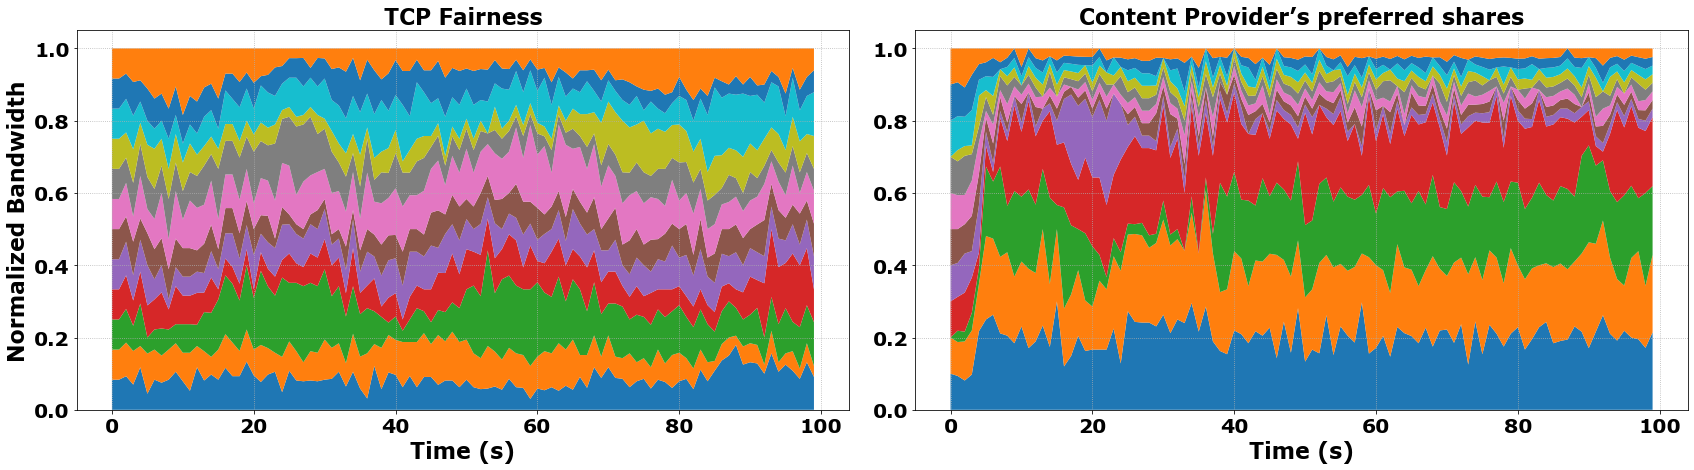

In [90]:
## PPT figures
n_len = 50
x = [i+1 for i in range(n_len)]
all_ys, all_ys_2 = [], []
for j in range(10):
    v, v2 = np.random.randint(1, 4), np.random.randint(1, 4)
    all_ys.append([v for i in range(n_len)])
    if j != 9:
        all_ys_2.append([v2 for i in range(n_len)])
    else:
        diff = np.sum(all_ys, axis=0)[0]-np.sum(all_ys_2, axis=0)[0]
        all_ys_2.append([diff for i in range(n_len)])

y, y2 = np.vstack(all_ys), np.vstack(all_ys_2)

fig, ax = plt.subplots(1, 2, figsize=(24, 7))
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Verdana'})
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})

print(left[:-7:2,:].shape)
print(np.sum(right[1::10,:], axis=0).shape)
ax[0].stackplot([i for i in range(100)], left[:-7:2,:]/np.sum(left[:-7:2,:], axis=0))
ax[1].stackplot([i for i in range(100)], right[1::10,:]/np.sum(right[1::10,:], axis=0))

ax[0].set_ylabel("Normalized Bandwidth", fontsize=22, fontweight='bold')
ax[0].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
ax[1].set_xlabel("Time (s)", fontsize=22, fontweight='bold')
ax[0].set_title("TCP Fairness", fontsize=22, fontweight='bold')
ax[1].set_title("Content Provider’s preferred shares", fontsize=22, fontweight='bold')

ax[0].tick_params(axis="both", labelsize=20)
ax[1].tick_params(axis="both", labelsize=20)
ax[0].grid(ls=':')
ax[1].grid(ls=':')

#ax[0].set_ylim([0, 55])
#ax[1].set_ylim([0, 55])

plt.tight_layout()
plt.show()